#### Data Description
 The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the ba


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("F:\\ML_practice_dataset\\bank-marketing.csv")

In [3]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [313]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (45211, 19)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  8
    Number of String-Categorical Columns =  6
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  5
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    19 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 36


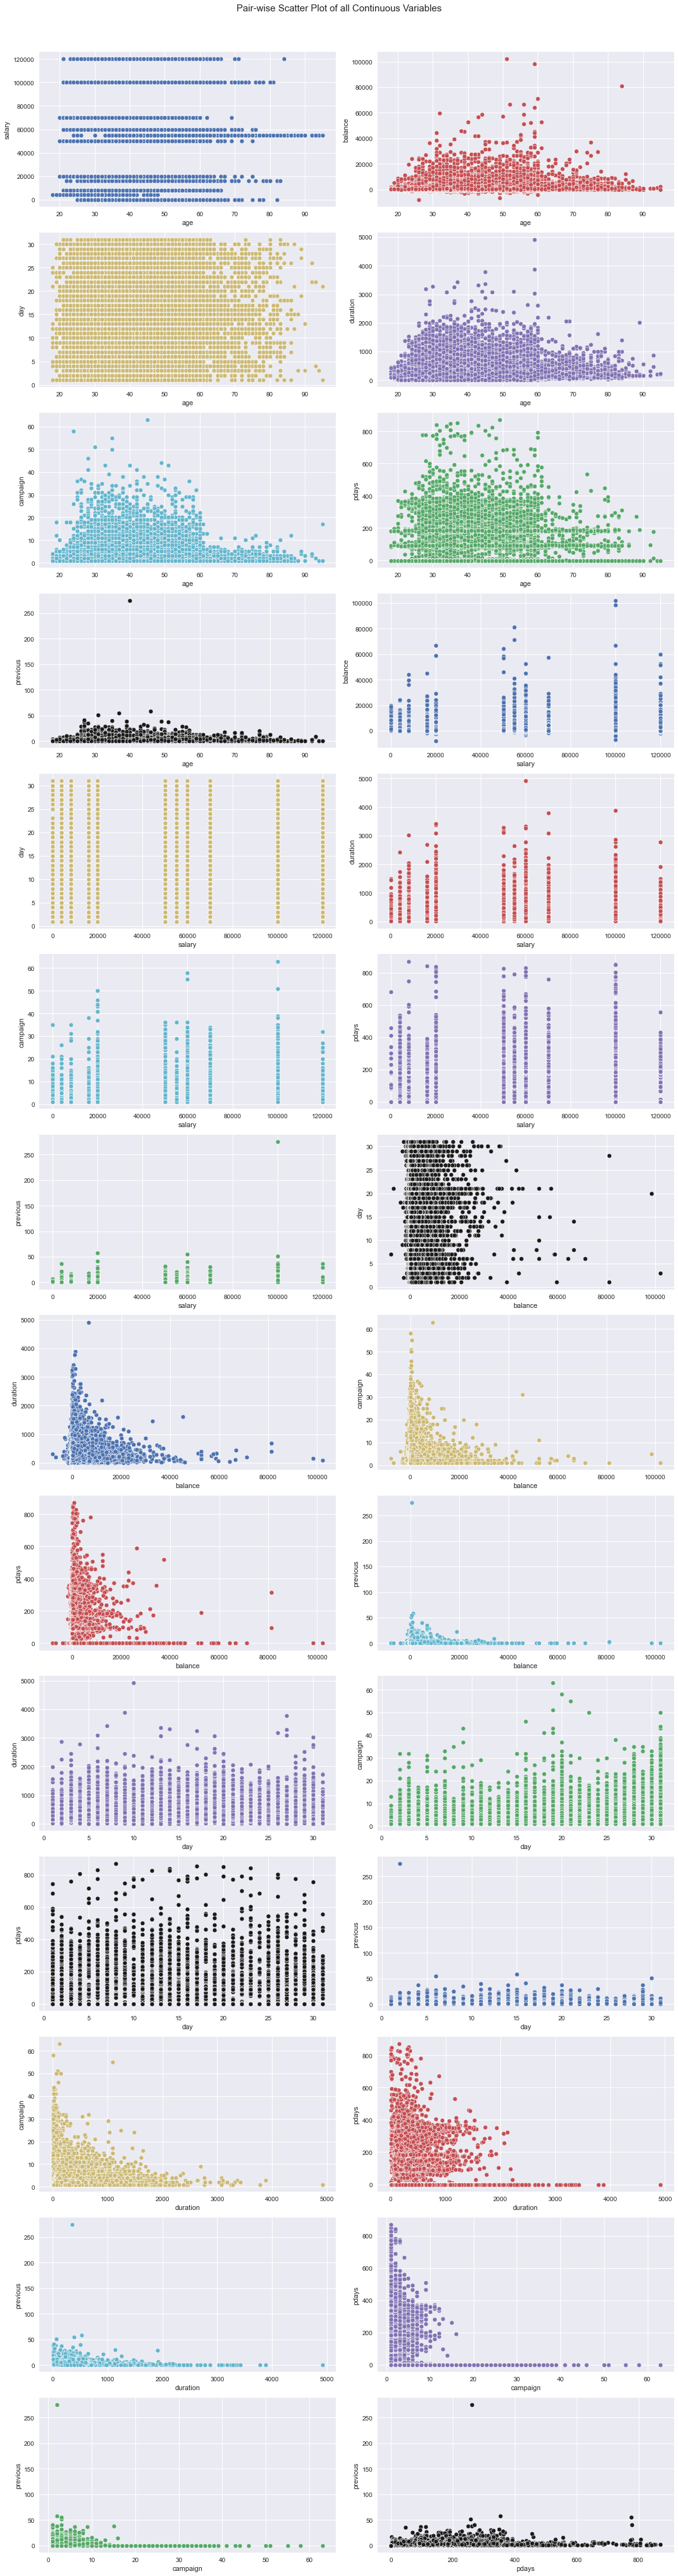

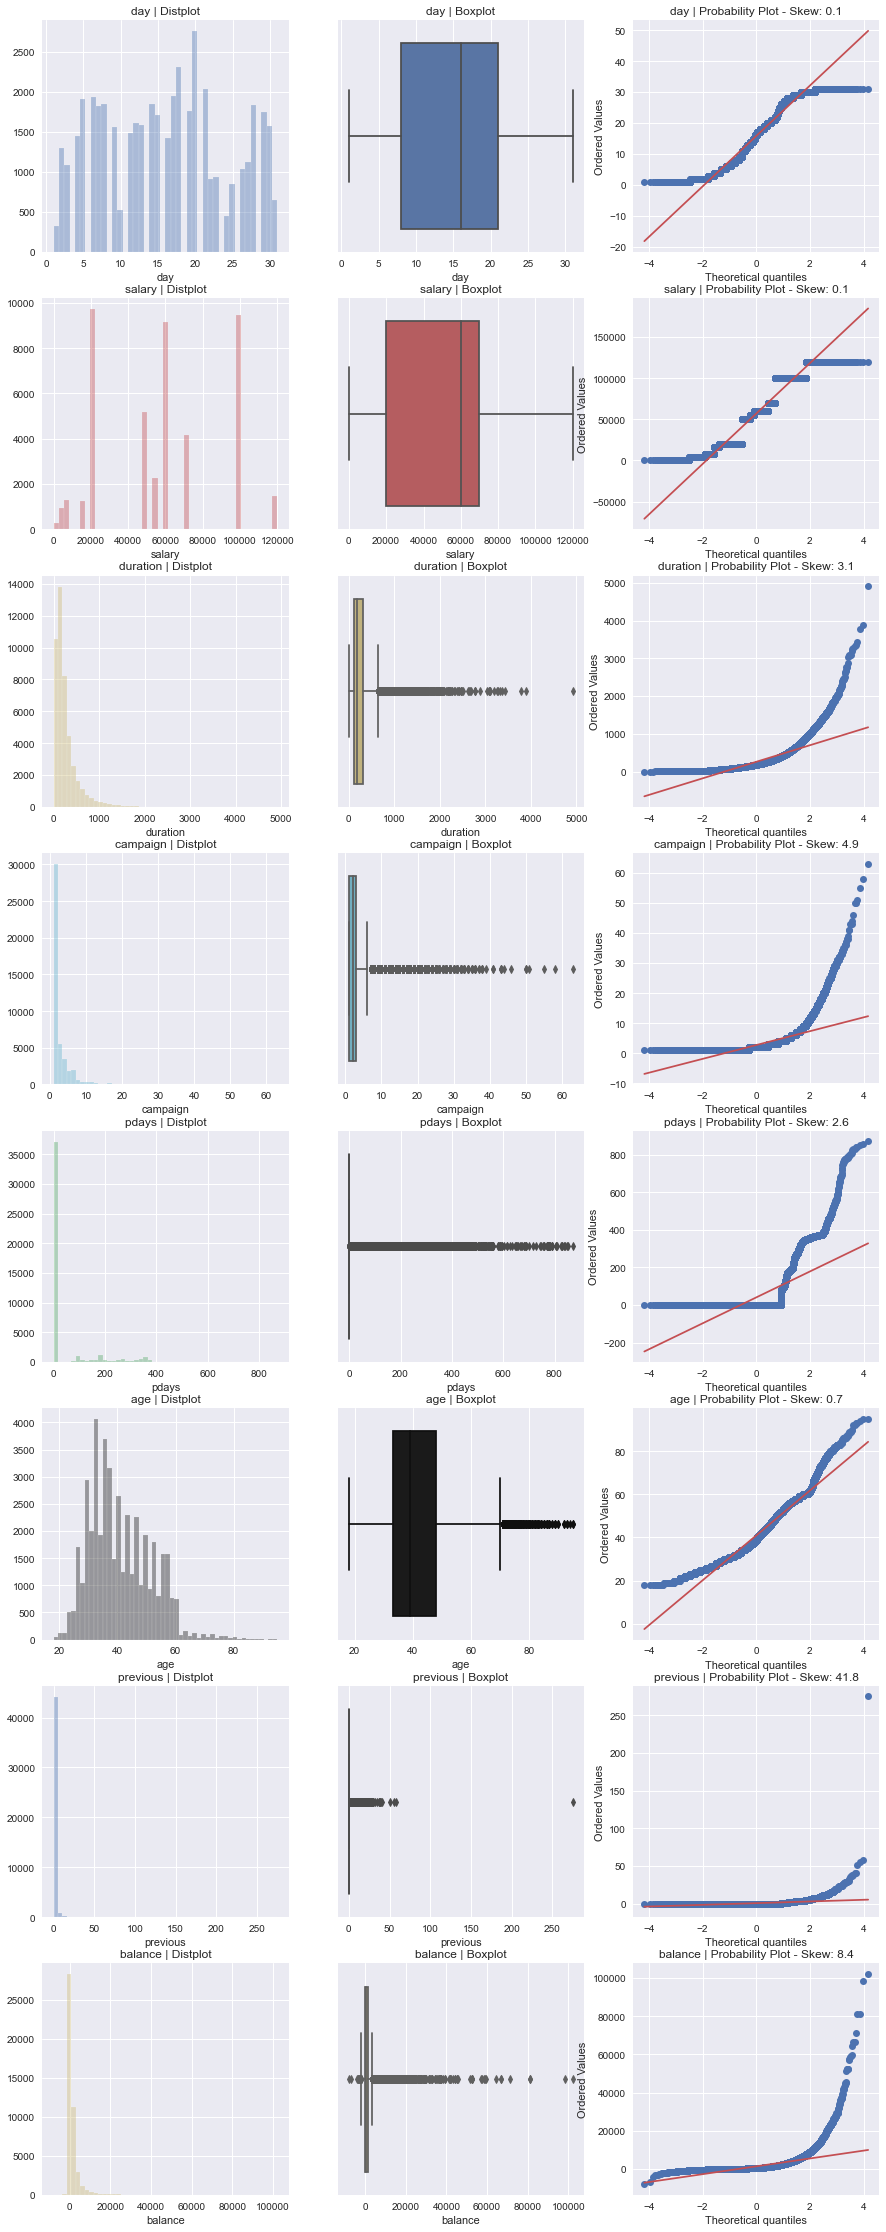

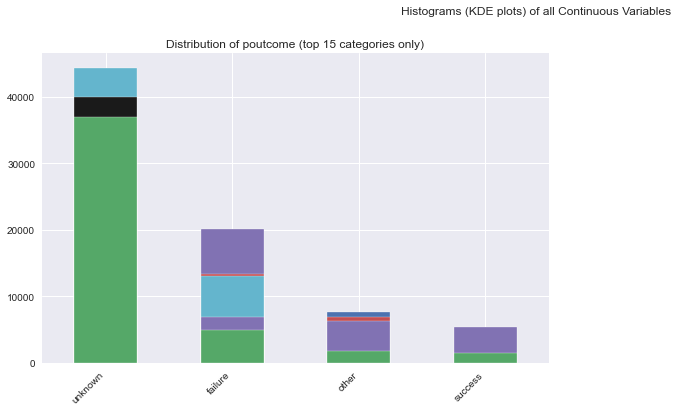

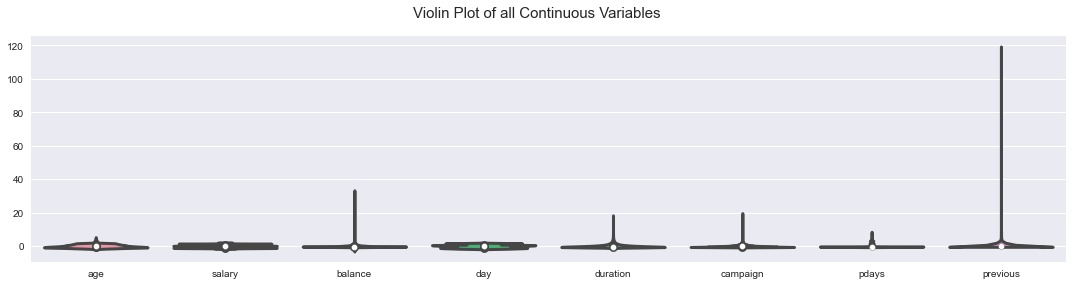

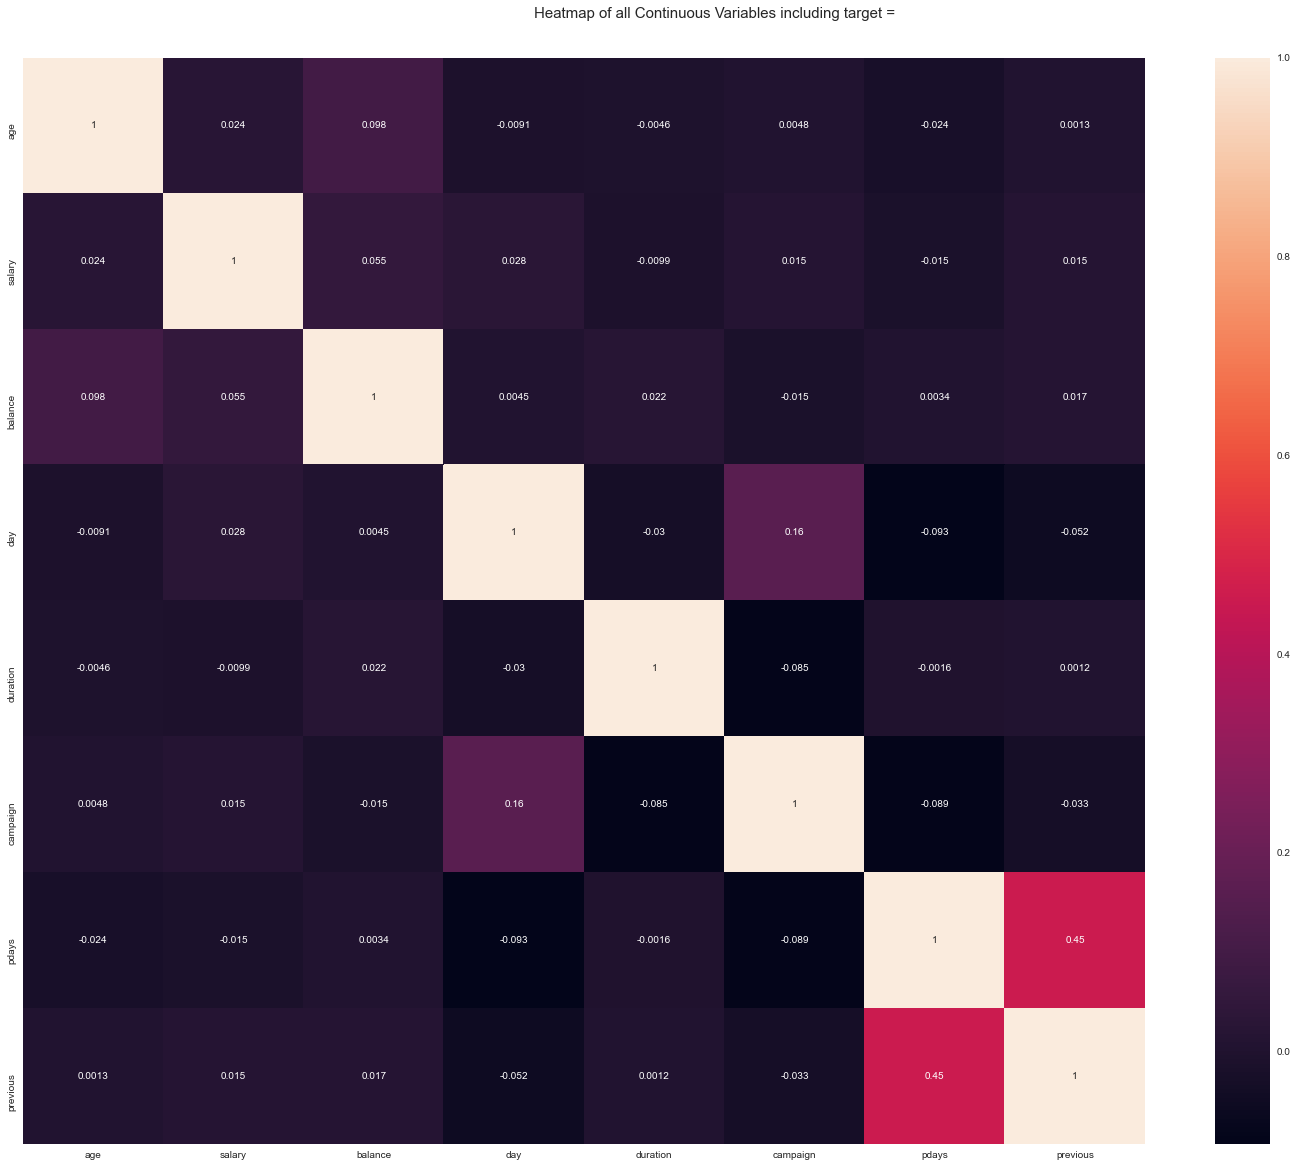

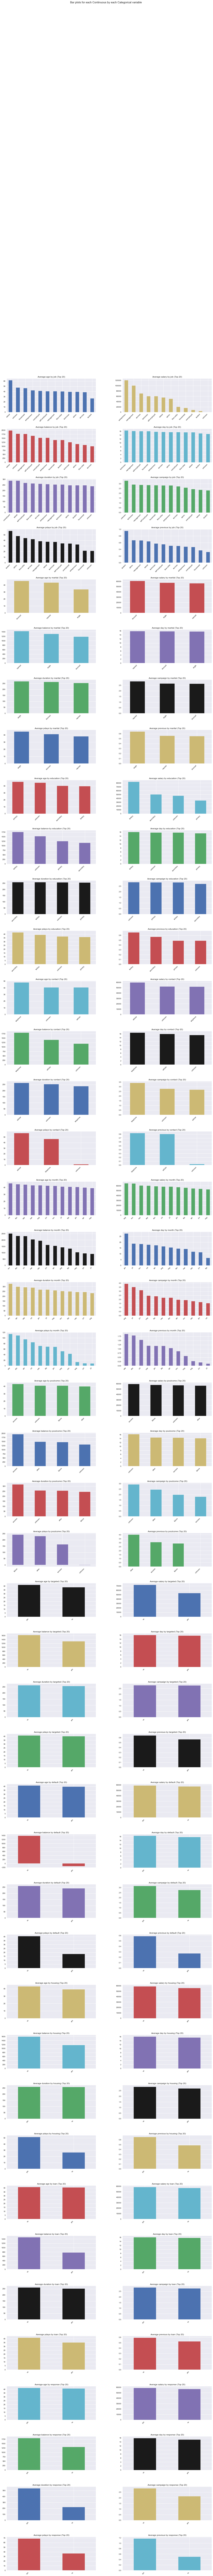

Time to run AutoViz (in seconds) = 64.172

 ###################### VISUALIZATION Completed ########################


In [314]:
filename ="F:\\ML_practice_dataset\\bank-marketing.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

In [6]:
df[df.duplicated()]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response


In [7]:
df.shape

(45211, 19)

In [8]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [9]:
df.dtypes

age           int64
job          object
salary        int64
marital      object
education    object
targeted     object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
response     object
dtype: object

In [10]:
df["response"].value_counts()

no     39922
yes     5289
Name: response, dtype: int64

In [11]:
for col in df.select_dtypes(include = "object").columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
targeted
['yes' 'no']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
response
['no' 'yes']


In [12]:
for col in df.select_dtypes(include = "object").columns:
    print(col)
    

job
marital
education
targeted
default
housing
loan
contact
month
poutcome
response


In [13]:
for col in df.select_dtypes(exclude= "object").columns:
    print(col)
    print(df[col].unique())

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
salary
[100000  60000 120000  20000      0  55000  50000  70000   8000  16000
   4000]
balance
[ 2143    29     2 ...  8205 14204 16353]
day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
duration
[ 261  151   76 ... 1298 1246 1556]
campaign
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
pdays
[ -1 151 166  91  86 143 147  89 140 176 101 174 170 167 195 165 129 188
 196 172 118 119 104 171 117 164 132 131 123 159 186 111 115 116 173 178
 110 152  96 103 150 175 193 181 185 154 145 138 126 180 109 158 168  97
 182 127 130 194 125 105 102  26 179  28 183 155 112 120 137 124 187 190
 113 162 134 169 189   8

In [14]:
for col in df.select_dtypes(exclude= "object").columns:
    print(col)
   

age
salary
balance
day
duration
campaign
pdays
previous


In [15]:
print(list(df.columns))

['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response']


#### Data Description

### Feature
1.age |int64| age in years\
2.job | object | type of job (categorical: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'])\
3.Salary |int 64| \
4.marital | object | marital status (categorical: ['married' 'single' 'divorced'])\
5.education | Object | education background (categorical: ['secondary' 'tertiary' 'primary' 'unknown'])\
6.targeted |object| ["yes","No]
7.default | Object | has credit in default? (categorical: ['no' 'yes'])\
8.balance | int64 | Balance of the individual\
9.housing | object | has housing loan? (categorical: ['yes' 'no'])\
10.loan | object | has personal loan? (categorical: ['no' 'yes'])\
11.contact | object | contact communication type (categorical: ['unknown' 'cellular' 'telephone'])\
12.day | int64 | last contact day of the week (categorical: 'mon','tue','wed','thu','fri')\
13.month | object | last contact month of year (categorical: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'])\
14.duration | int64 | last contact duration, in seconds (numeric)\
15.campaign | int64 | number of contacts performed during this campaign and for this client\
16.pdays | int64 | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)\
17.previous | int64 | number of contacts performed before this campaign and for this client\
18.poutcome | object | outcome of the previous marketing campaign (categorical: ['unknown' 'other' 'failure' 'success'])`\
19.['response']  |object| ['no' 'yes'] ########## Target Variable


#### Label
1.response|object| heas the client subscibed a term deposit(binary'yes','no')

#### Categorical columns
- job
- marital
- education
- targeted
- default
- housing
- loan
- contact
- month
- poutcome
- response

#### Numerical Columns
- age
- salary
- balance
- day
- duration
- campaign
- pdays
- previous

#### Exploratory Data Analysis
- find unwanted Columns
- find missing values 
- Find features with one values
- Explore the Categorical Features
- Find Categorical Feature Distribution
- Relationship between Categorical Features and Label
- Explore the Numerical Features
- Find Discrete Numerical Features
- Relation between Discrete numerical Features and Labels
- Find Continous Numerical Features
- Distribution of Continous Numerical Features
- Relation between Continous numerical Features and Labels
- Find Outliers in numerical features
- Explore the Correlation between numerical features
- Find Pair Plot
- Check the Data set is balanced or not based on target values in classification

#### Find Unwanted Columns

In [16]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### There have no any unwanted columns

#### Find Missing Values

In [17]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

#### No missing value Found

#### Find Features With unique Values

In [18]:
for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
salary 11
marital 3
education 4
targeted 2
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
response 2


#### Explore the Categorical Features

In [19]:
categorical_features = [feature for feature in df.columns if ((df[feature].dtypes == "object") & (feature not in ['response']))]

In [20]:
print(categorical_features)

['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [21]:
for feature in categorical_features:
    print(f'The feature is {feature} and number of category are {(len(df[feature].unique()))}')

The feature is job and number of category are 12
The feature is marital and number of category are 3
The feature is education and number of category are 4
The feature is targeted and number of category are 2
The feature is default and number of category are 2
The feature is housing and number of category are 2
The feature is loan and number of category are 2
The feature is contact and number of category are 3
The feature is month and number of category are 12
The feature is poutcome and number of category are 4


###### There are ten Categorical Features ,feature job and month job has highest no of categorical Values

## Make suitable plots for associations with numerical features and categorical features’

#### Find categorical features Distribution

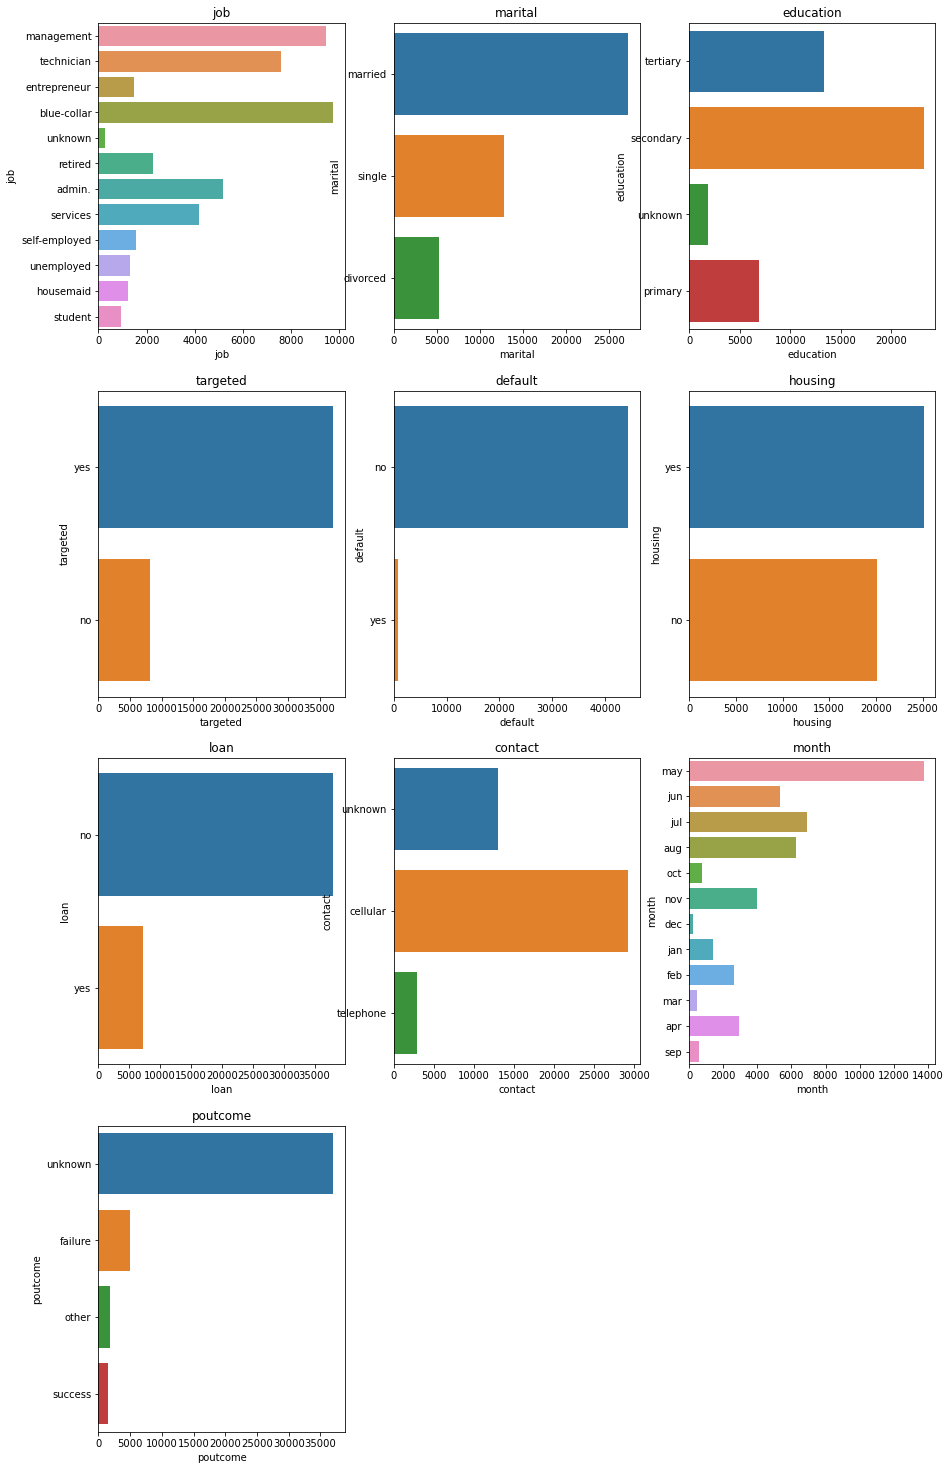

In [22]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

In [23]:
# for i in categorical_features:
#     plt.figure(figsize = (8,5))
#     sns.countplot(y=i,data=df)
# plt.show()

#### Take Away
- client with job type as management records are high in given dataset and housemaid are very less
- client who married are high in records in given dataset and divorced are less
- client whoes education background is secondary are in high numbers in given dataset
- defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop
- data in month of may is high and less in dec
- Puotout columns unkown values is more

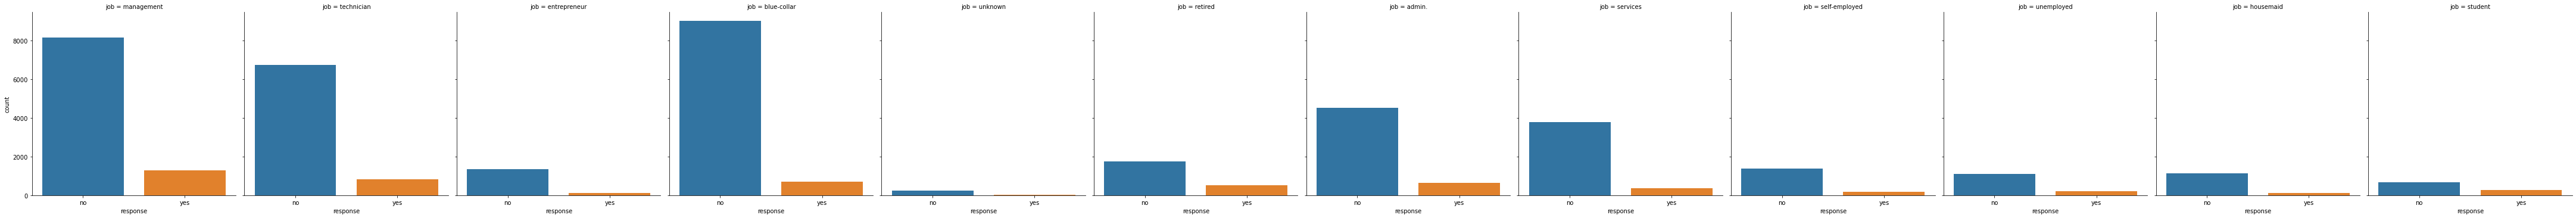

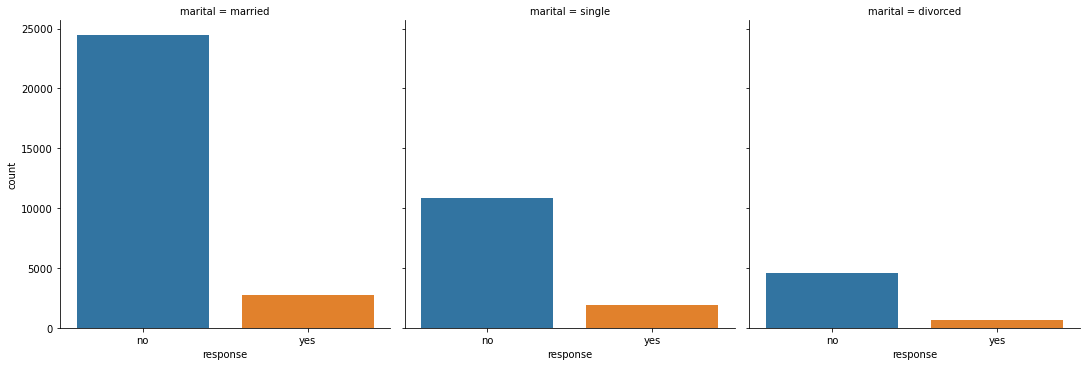

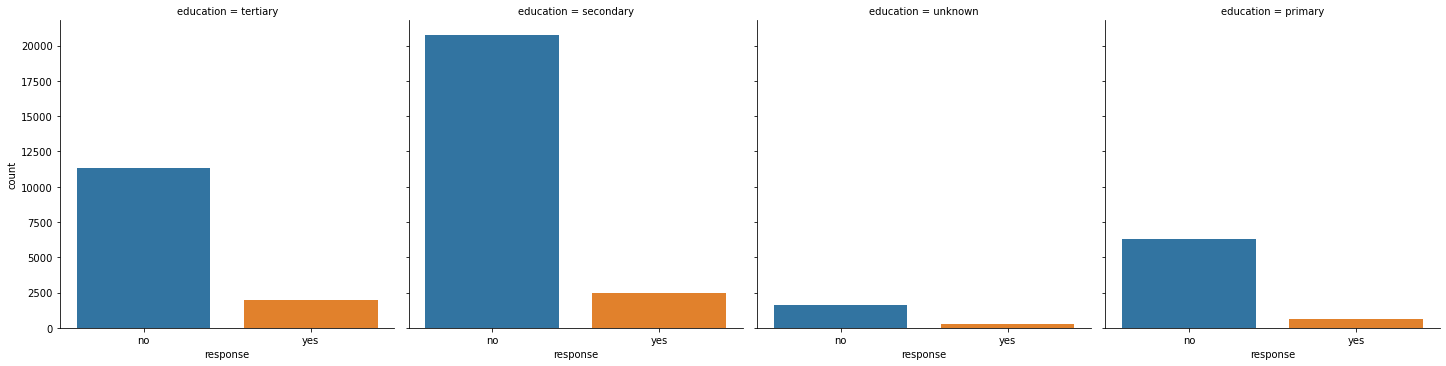

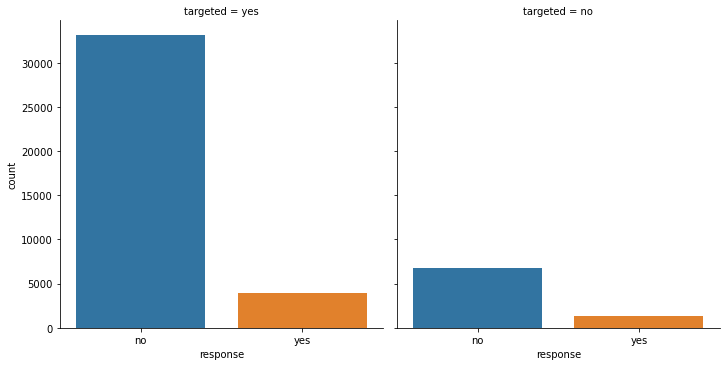

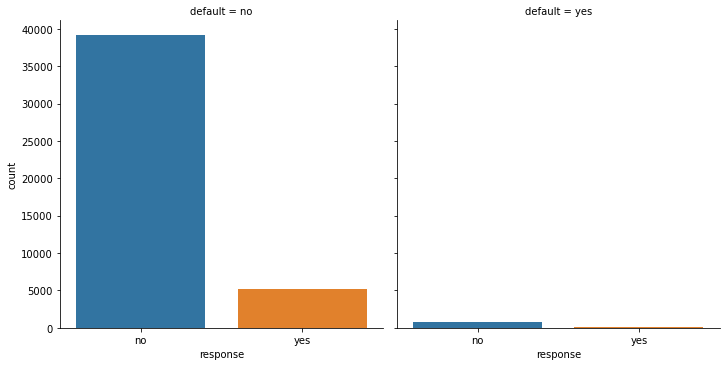

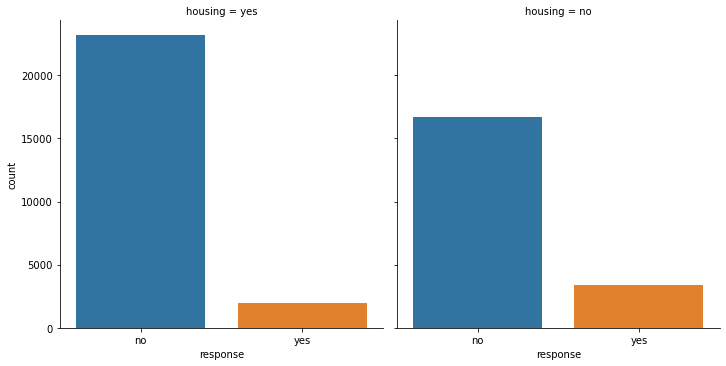

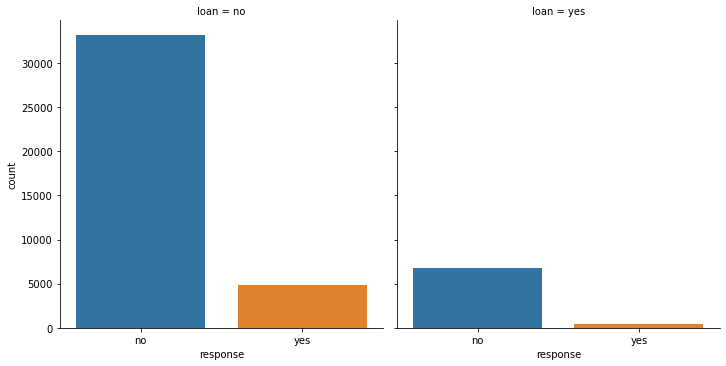

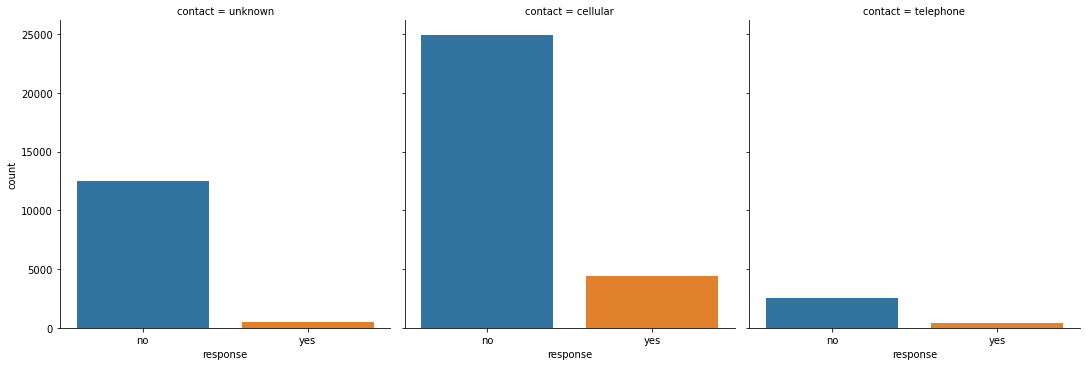

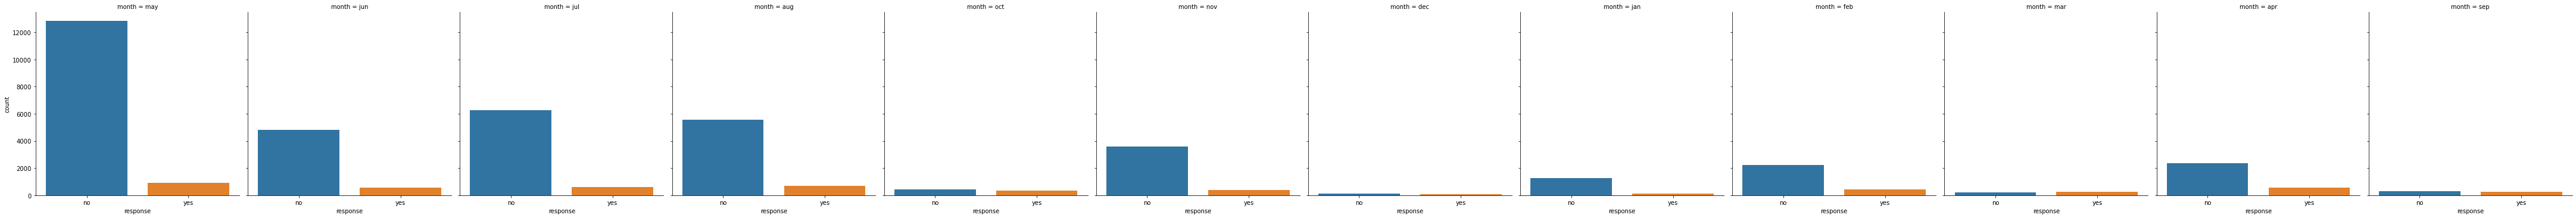

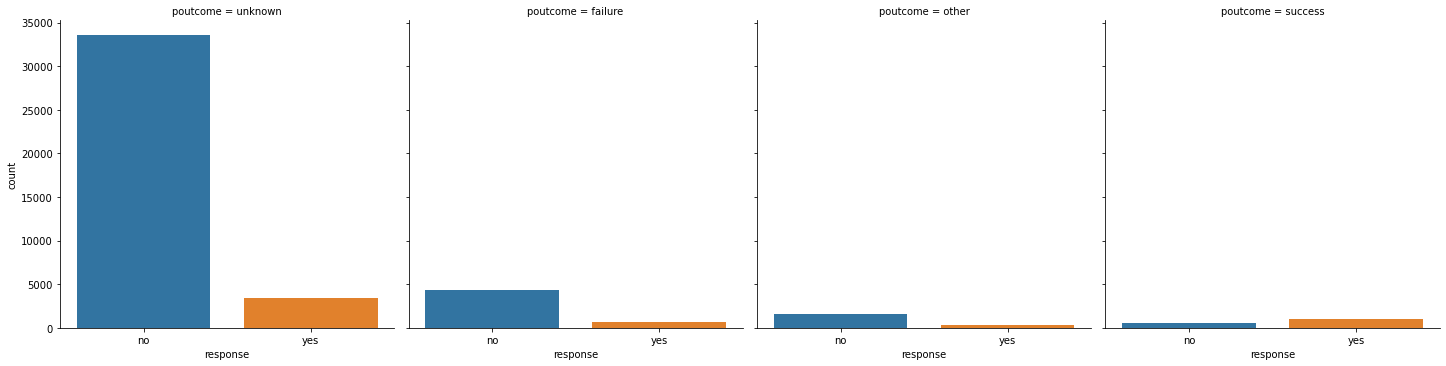

In [24]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='response', col=categorical_feature, kind='count', data= df)
plt.show()

In [25]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df.groupby(['response',categorical_feature]).size())

response  job          
no        admin.           4540
          blue-collar      9024
          entrepreneur     1364
          housemaid        1131
          management       8157
          retired          1748
          self-employed    1392
          services         3785
          student           669
          technician       6757
          unemployed       1101
          unknown           254
yes       admin.            631
          blue-collar       708
          entrepreneur      123
          housemaid         109
          management       1301
          retired           516
          self-employed     187
          services          369
          student           269
          technician        840
          unemployed        202
          unknown            34
dtype: int64
response  marital 
no        divorced     4585
          married     24459
          single      10878
yes       divorced      622
          married      2755
          single       1912
dtype: i

#### Take-away:
- retired client has high interest on deposit
- client who has housing loan seems to be not interested much on deposit
- if pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit
- in month of March, September, October and December, client show -high interest to deposit
- in month of may, records are high but client interst ratio is very less

### Explore the Numerical Features

In [26]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))


Number of numerical variables:  8


In [27]:
df[numerical_features].head()

,age,salary,balance,day,duration,campaign,pdays,previous
0,58,100000,2143,5,261,1,-1,0
1,44,60000,29,5,151,1,-1,0
2,33,120000,2,5,76,1,-1,0
3,47,20000,1506,5,92,1,-1,0
4,33,0,1,5,198,1,-1,0


#### Checkthe NaN values In Numerical Columns

In [28]:
df[df["age"].isnull()]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response


In [29]:
df[df["salary"].isnull()]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response


In [30]:
df[df["balance"].isnull()]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response


In [31]:
df[df["day"].isnull()]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response


In [32]:
df[df["duration"].isnull()]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response


In [33]:
df[df["campaign"].isnull()]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response


In [34]:
df[df["pdays"].isnull()]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response


In [35]:
df[df["previous"].isnull()]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response


In [36]:
df[numerical_features].head()

,age,salary,balance,day,duration,campaign,pdays,previous
0,58,100000,2143,5,261,1,-1,0
1,44,60000,29,5,151,1,-1,0
2,33,120000,2,5,76,1,-1,0
3,47,20000,1506,5,92,1,-1,0
4,33,0,1,5,198,1,-1,0


#### Take Away
There are & Numerical Features

#### Find disrete Numerical Features

In [37]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<15]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [38]:
#### I

In [39]:
df[discrete_feature].nunique()

salary    11
dtype: int64

#### Take Away
- There is variable Discrete Variables In given Data set

#### 9.Relation Between Discrete Numerical Features ANd Label
N.A

####  Find the continuous numerical features

In [40]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['response']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


#### Take away
there are seven contionous numerical features

#### DIstribution of continous Numerical Features

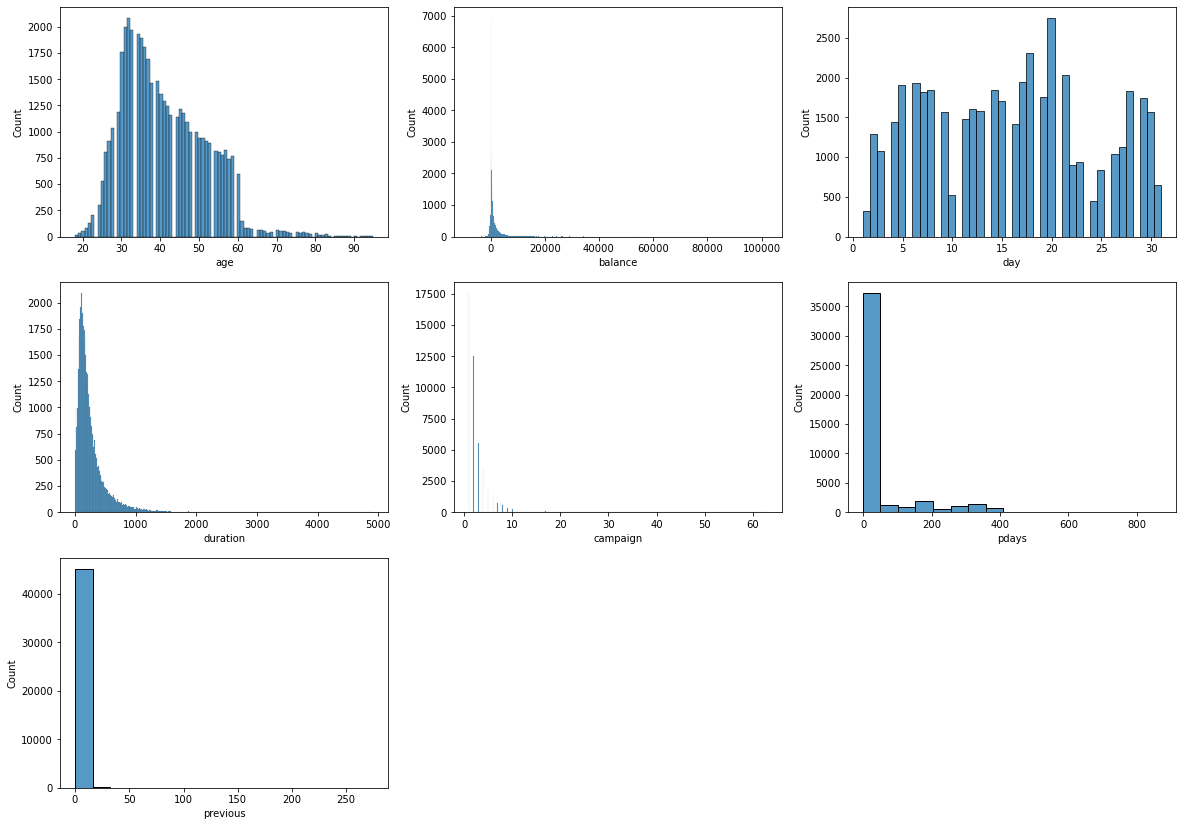

In [41]:
#### plot a univariate distribution of continues observations
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

#### Take-away:
it seems age, days distributed normally
balance, duration, compaign, pdays and previous heavely skewed towards left and seems to be have some outliers.

#### Relation between Continous numerical Features and Target Variables

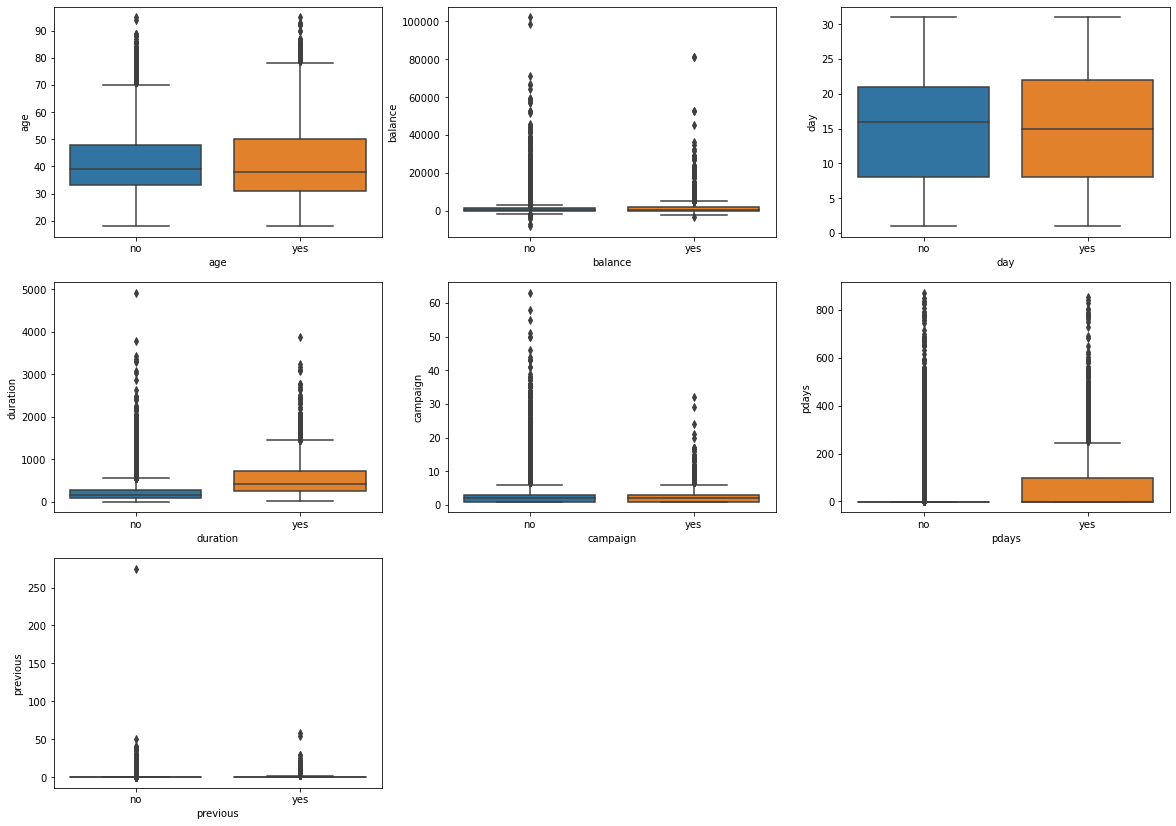

In [42]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="response", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

### Find Outliers in numerical features

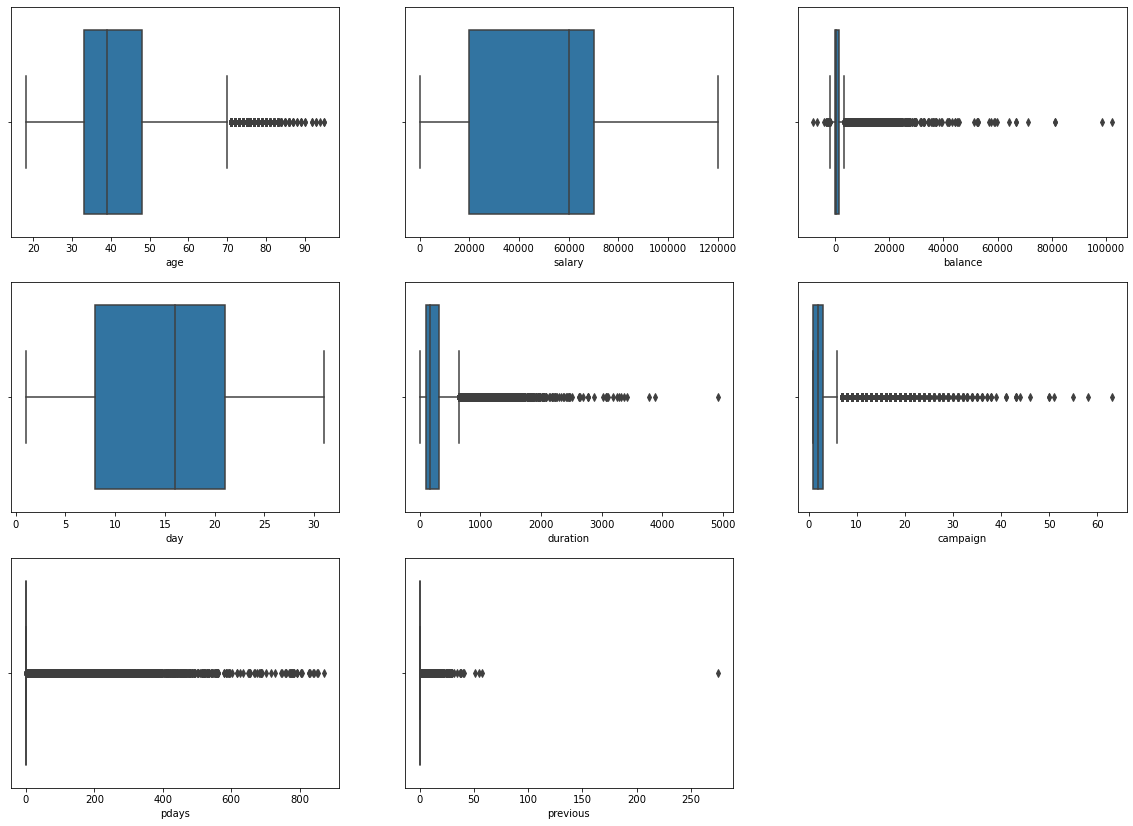

In [43]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x=df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

#### Checking Corelation between Numerical Features

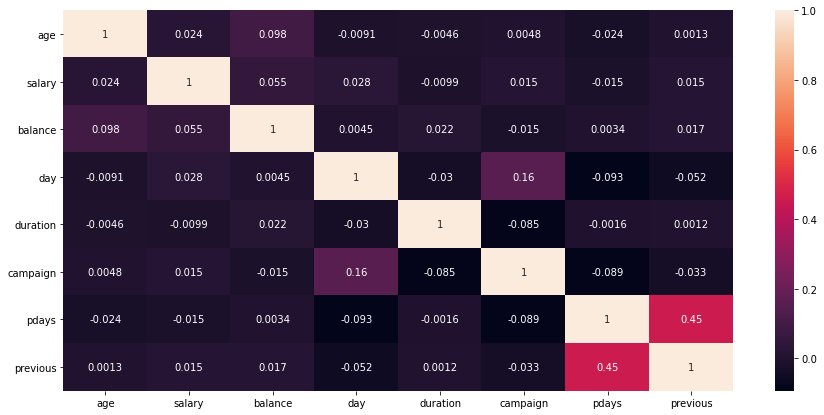

In [44]:
# Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)
plt.show()

####  It seems a couple of  feature is heavely correlated each other

In [45]:
num_cols= df._get_numeric_data().columns.to_list()


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


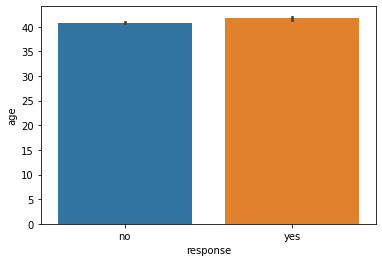

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


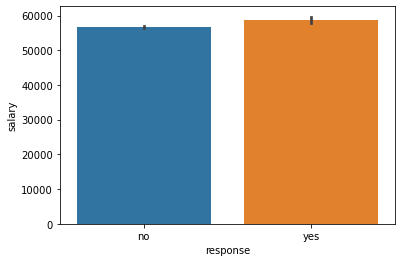

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


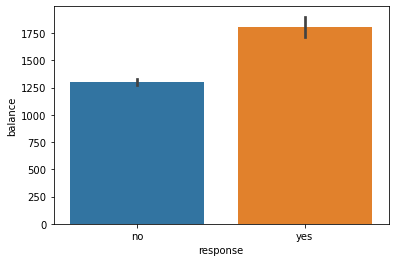

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


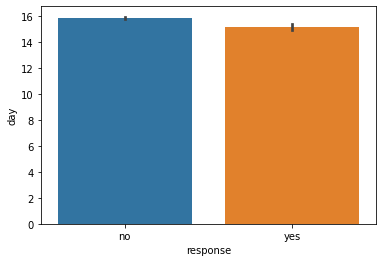

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


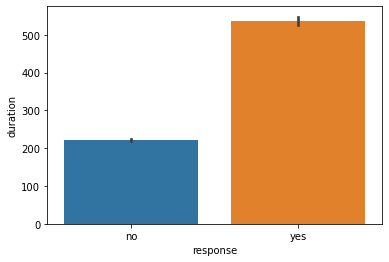

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


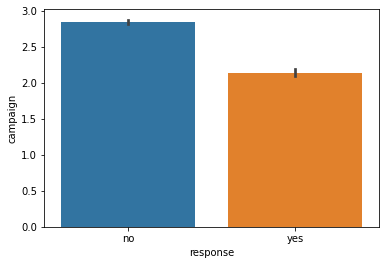

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


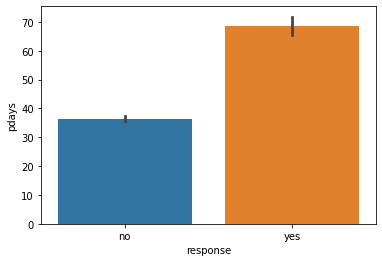

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


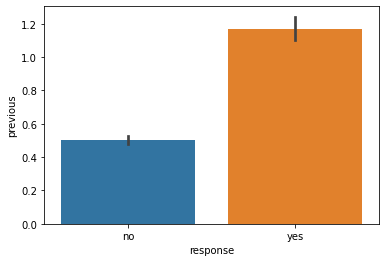

In [46]:
for i in df[num_cols]:
    sns.barplot(df['response'],df[i])
    plt.show()

#### Check the data Set is balanced or not base don target values in classification

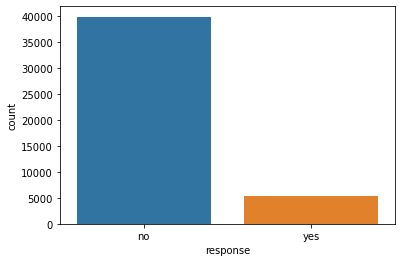

In [47]:
#total Patient count based on cardio_result
sns.countplot(x="response",data=df)
plt.show()

In [48]:
total=len(df["pdays"])

In [49]:
total

45211

In [50]:
neg = len(df[df["pdays"] <1])

In [51]:
neg

36954

In [52]:
percentof_nv = round(neg/total,2)*100
percentof_nv

82.0

<AxesSubplot:xlabel='pdays', ylabel='Count'>

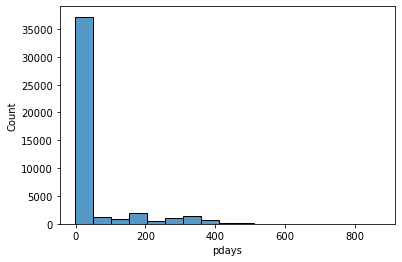

In [53]:
sns.histplot(x='pdays',data =df)

In [54]:
df['response'].groupby(df['response']).count()

response
no     39922
yes     5289
Name: response, dtype: int64

#### Given Dataset is Unbalanced

#### Feature Engineering
- Drop unwanted Features

- Handle Missing Values

- Handle Categorical Features

- Handle Feature Scalling

- Remove Outliers

>> As per Exploratory Data Analysis EDA 
- no missing value found
- no feature found with one value
- 9 categorical features
- defaut features does not play imp role
- it seems some outliers found (age, balance, duration, compaign, pdays and previous has some outliers)

In [55]:
df1 = df.copy()

In [56]:
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [57]:
df1.shape

(45211, 19)

#### Drop the features Which has  not play importand role

In [58]:
# Default features Does Not play important role

In [59]:
#defaut features does not play imp role
df1.groupby(['response','default']).size()

response  default
no        no         39159
          yes          763
yes       no          5237
          yes           52
dtype: int64

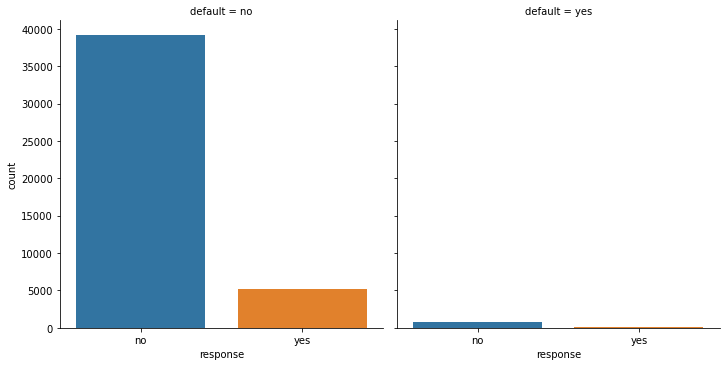

In [60]:
sns.catplot(x="response",col="default",kind="count",data=df1)
plt.show()

In [61]:
df1.drop(["default"],axis=1,inplace=True)

In [62]:
df1.head()

,age,job,salary,marital,education,targeted,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [63]:
#total=len(df["pdays"])

In [64]:
#neg = len(df[df["pdays"] <1])

In [65]:
#percentof_nv = round(neg/total,2)*100
#percentof_nv

In [66]:
# drop pdays as it has -1 value for around 80%+ 
#df2.drop(['pdays'],axis=1, inplace=True)

####  Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [67]:
df1["pdays"].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [68]:
print("Mean:",df1['pdays'].mean())
print("Median:",df1['pdays'].median())
print('Mode:',df1['pdays'].mode())

Mean: 40.19782796222158
Median: -1.0
Mode: 0   -1
dtype: int64


In [69]:
df1['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

#### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [70]:
df1 = df[df['pdays'] != -1]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8257 entries, 24060 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8257 non-null   int64 
 1   job        8257 non-null   object
 2   salary     8257 non-null   int64 
 3   marital    8257 non-null   object
 4   education  8257 non-null   object
 5   targeted   8257 non-null   object
 6   default    8257 non-null   object
 7   balance    8257 non-null   int64 
 8   housing    8257 non-null   object
 9   loan       8257 non-null   object
 10  contact    8257 non-null   object
 11  day        8257 non-null   int64 
 12  month      8257 non-null   object
 13  duration   8257 non-null   int64 
 14  campaign   8257 non-null   int64 
 15  pdays      8257 non-null   int64 
 16  previous   8257 non-null   int64 
 17  poutcome   8257 non-null   object
 18  response   8257 non-null   object
dtypes: int64(8), object(11)
memory usage: 1.3+ MB


In [71]:
print("Mean:",df1['pdays'].mean())
print("Median:",df1['pdays'].median())
print('Mode:',df1['pdays'].mode())

Mean: 224.57769165556496
Median: 194.0
Mode: 0    182
dtype: int64


#### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [72]:
df1["balance"].nunique()

3176

In [73]:
df1["education"].unique()

array(['tertiary', 'secondary', 'primary', 'unknown'], dtype=object)

In [74]:
# df1.groupby("education")["balance"].median()


In [75]:
df1.groupby("education").median()["balance"]


education
primary      520.0
secondary    527.0
tertiary     775.0
unknown      782.0
Name: balance, dtype: float64

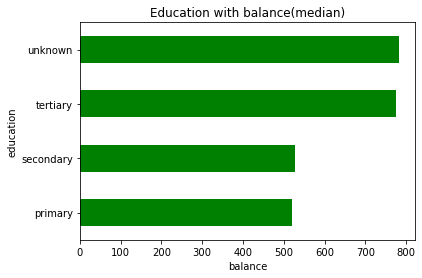

Unknown Columns Has Highest Median 782.0


In [76]:
#### median values with balance
plt.title("Education with balance(median)")
plt.xlabel('balance')
plt.ylabel('Education')
median_values = df1.groupby("education").median()["balance"]
median_values.plot(kind ="barh",color ="g")
plt.show()

print("Unknown Columns Has Highest Median",max(median_values))

#### Make a box plot for pdays. Do you see any outliers?

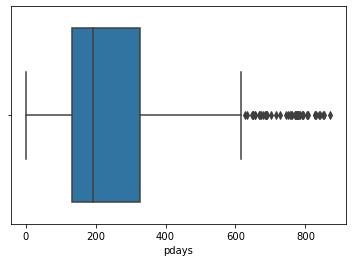

In [77]:
sns.boxplot(x='pdays',data=df1)
plt.show()

In [78]:
df1["pdays"].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [79]:
df["pdays"].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

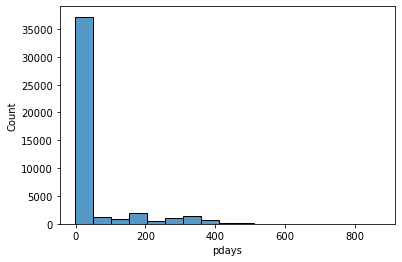

In [80]:
sns.histplot(df["pdays"])
plt.show()

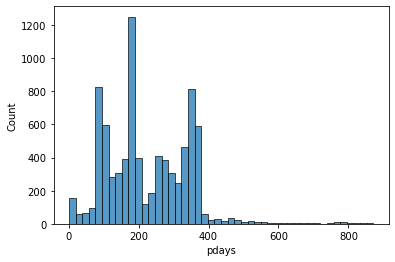

In [81]:
sns.histplot(df1["pdays"])
plt.show()

In [82]:
df1["pdays"].max()

871

In [83]:
df1['pdays'].min()

1

In [84]:
q1 =np.quantile(df1["pdays"],0.25)
q2 =np.quantile(df1["pdays"],0.50)
q3 =np.quantile(df1["pdays"],0.75)

In [85]:
print(f"25th percentile:{q1}|50th percentile :{q2}|75th percentile :{q3}")

25th percentile:133.0|50th percentile :194.0|75th percentile :327.0


In [86]:
#IQR = Q3-Q1

IQR = q3-q1
print(IQR)

194.0


In [87]:
UW = q3 +(1.5*IQR)
LW = q1 -(1.5 *IQR)


In [88]:
print(f' upper wishker:{UW}|Lower wiskher:{LW}')

 upper wishker:618.0|Lower wiskher:-158.0


In [89]:
outlers =[]
for i in df1["pdays"]:
    if i >UW:
        outlers.append(i)
    


In [90]:
print(outlers)

[667, 626, 648, 633, 670, 687, 651, 686, 674, 687, 756, 745, 776, 683, 791, 701, 792, 784, 717, 782, 728, 828, 651, 761, 775, 760, 656, 831, 655, 749, 838, 769, 792, 778, 854, 779, 850, 771, 842, 779, 680, 808, 690, 772, 774, 826, 804, 805, 871]


In [91]:
numofol=len(outlers)
numofval = len(df1["pdays"])
print(numofol)
print(numofval)

49
8257


In [92]:
percentofoutliers = round(numofol/numofval,2)*100
percentofoutliers

1.0

In [93]:
avg = df1["pdays"].mean()

In [94]:
print(avg)

224.57769165556496


In [95]:
df1["pdays"].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [96]:
df1['pdays'] = np.where(df1["pdays"] > UW ,avg,df1["pdays"])

<ipython-input-96-5a977c4d6296>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pdays'] = np.where(df1["pdays"] > UW ,avg,df1["pdays"])


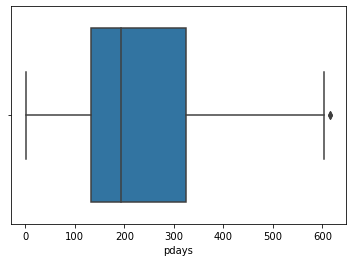

In [97]:
sns.boxplot(x="pdays",data = df1)
plt.show()

In [98]:
df1["pdays"].max()

616.0

In [99]:
print(outlers)

[667, 626, 648, 633, 670, 687, 651, 686, 674, 687, 756, 745, 776, 683, 791, 701, 792, 784, 717, 782, 728, 828, 651, 761, 775, 760, 656, 831, 655, 749, 838, 769, 792, 778, 854, 779, 850, 771, 842, 779, 680, 808, 690, 772, 774, 826, 804, 805, 871]


In [100]:
df1[df1["pdays"] > 618]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


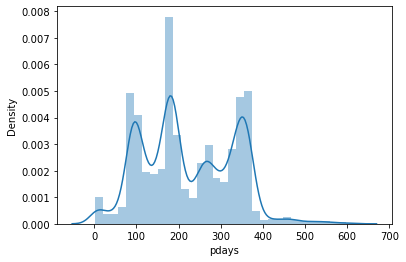

In [101]:
sns.distplot(df1["pdays"])
plt.show()

In [102]:
df1.shape

(8257, 19)

#### First, perform bi-variate analysis to identify the features that are directly associated with the target variable. You can refer to the notebook we used for the EDA discussion.
- Convert the response variable to a convenient form


In [103]:
####Convert the response variable to a convenient form
df1['response'] = np.where(df1['response']=='no',0,1)

<ipython-input-103-4740deaad63d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['response'] = np.where(df1['response']=='no',0,1)


In [104]:
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151.0,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166.0,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91.0,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86.0,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143.0,3,failure,1


# Bivariate Analysis

In [105]:
#### Multi Variate Analysis

#### Are the features about the previous campaign data useful?


In [106]:
df1["previous"].value_counts().sort_values(ascending=False)

1      2772
2      2106
3      1142
4       714
5       459
6       277
7       205
8       129
9        92
10       67
11       65
12       44
13       38
15       20
14       19
17       15
16       13
19       11
20        8
23        8
22        6
18        6
27        5
24        5
21        4
29        4
25        4
30        3
28        2
37        2
26        2
38        2
41        1
51        1
58        1
275       1
55        1
40        1
32        1
35        1
Name: previous, dtype: int64

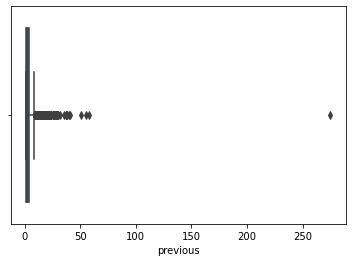

In [107]:
sns.boxplot(x="previous",data=df1)
plt.show()

In [108]:
df1["previous"].describe()

count    8257.000000
mean        3.177546
std         4.560820
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       275.000000
Name: previous, dtype: float64

<AxesSubplot:xlabel='response', ylabel='previous'>

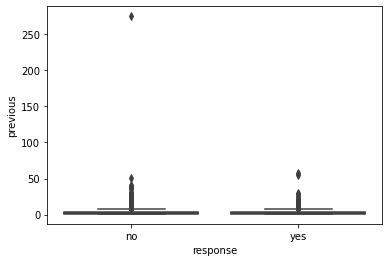

In [109]:
 sns.boxplot(x="response", y= df1['previous'], data=df)

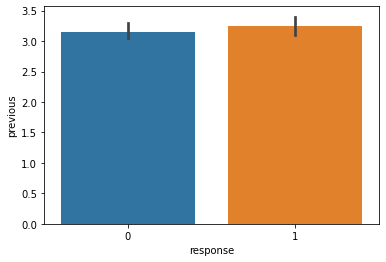

In [110]:
sns.barplot(x="response", y= df1['previous'], data=df1)
plt.show()

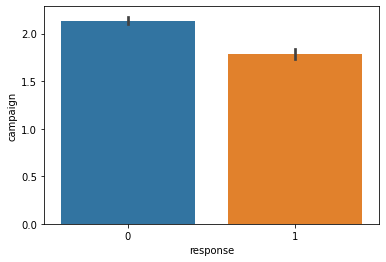

In [111]:
sns.barplot(x="response", y= df1['campaign'], data=df1)
plt.show()    

#### Are pdays and poutcome associated with the target?

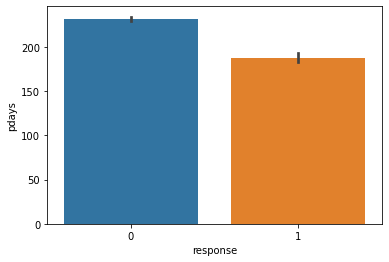

In [112]:
sns.barplot(x="response", y= df1['pdays'], data=df1)
plt.show()

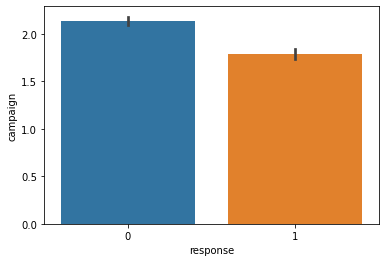

In [113]:
sns.barplot(x="response", y= df1['campaign'], data=df1)
plt.show()

#### If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.


In [114]:
df1[df1['previous'].isnull()]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response


In [115]:
# remove outliers in feature previous...
df1.groupby(['response','previous'],sort=True)['previous'].count()

response  previous
0         1           2189
          2           1650
          3            848
          4            543
          5            338
                      ... 
1         26             1
          29             1
          30             1
          55             1
          58             1
Name: previous, Length: 64, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='previous', ylabel='Density'>

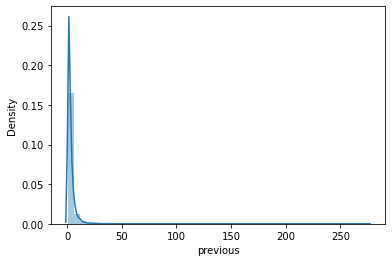

In [116]:
sns.distplot(df1["previous"])

In [117]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df1.previous.quantile(0.75)-df1.previous.quantile(0.25)

In [118]:
#### Extreme outliers
lower_bridge=df1['previous'].quantile(0.25)-(IQR*3)
upper_bridge=df1['previous'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-8.0
13.0


(None, None)

In [119]:
#### Extreme outliers
lower_bridge=df1['previous'].quantile(0.25)-(IQR*3)
upper_bridge=df1['previous'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-8.0
13.0


(None, None)

In [120]:
df1.loc[df1['previous']>=13,'previous']=13

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [121]:
df1["previous"].describe()

count    8257.000000
mean        3.007872
std         2.640447
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        13.000000
Name: previous, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='previous', ylabel='Density'>

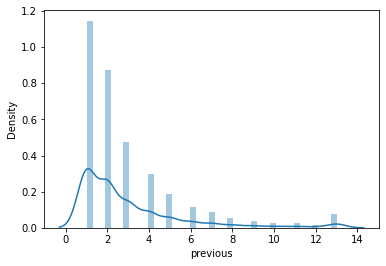

In [122]:
sns.distplot(df1["previous"])

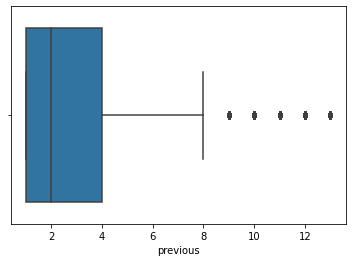

In [123]:
sns.boxplot(x="previous",data=df1)
plt.show()

In [124]:
df1[df1['campaign'].isnull()]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response


In [125]:
df["previous"].isnull().sum()

0

In [126]:
df["campaign"].isnull().sum()

0

In [127]:
# remove outliers in feature campaign...
df1.groupby(['response','campaign'],sort=True)['campaign'].count()

response  campaign
0         1           2977
          2           1771
          3            694
          4            352
          5            220
          6            142
          7             91
          8             50
          9             22
          10            10
          11            11
          12             7
          13             2
          14             1
          15             1
          16             1
1         1           1038
          2            505
          3            219
          4             73
          5             36
          6             21
          7              6
          8              4
          9              2
          11             1
Name: campaign, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='campaign', ylabel='Density'>

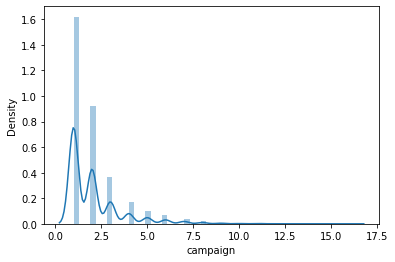

In [128]:
sns.distplot(df1["campaign"])

In [129]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df1.campaign.quantile(0.75)-df1.campaign.quantile(0.25)

In [130]:
#### Extreme outliers
lower_bridge=df1['campaign'].quantile(0.25)-(IQR*3)
upper_bridge=df1['campaign'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-2.0
5.0


(None, None)

In [131]:
df1.loc[df1['campaign']>5,'campaign']=5

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='campaign', ylabel='Density'>

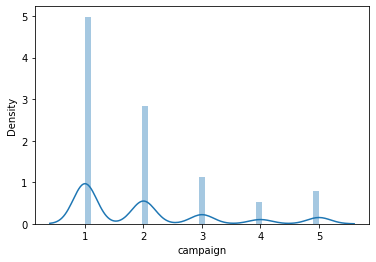

In [132]:
sns.distplot(df1["campaign"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


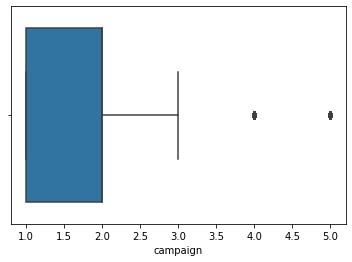

In [133]:
sns.boxplot(df1["campaign"])
plt.show()

In [134]:
df1["campaign"].value_counts().sort_values()

4     425
5     628
3     913
2    2276
1    4015
Name: campaign, dtype: int64

In [135]:
# q1=np.quantile(df['campaign'],0.25)
# q2=np.quantile(df['campaign'],0.50)
# q3=np.quantile(df['campaign'],0.75)


In [136]:
# print(f"25th percentile:{q1}|50th percentile :{q2}|75th percentile :{q3}")

In [137]:
# #IQR = Q3-Q1

# IQR = q3-q1
# print(IQR)

In [138]:

# LW = q1 -(1.5 *IQR)
# uw = q1+(1.5*IQR)

In [139]:
# print(f' upper wishker:{UW}|Lower wiskher:{LW}')

In [140]:
# outlers =[]
# for i in df["campaign"]:
#     if i <-5:
#         outlers.append(i)

In [141]:
# print(outlers)

In [142]:
# numofol=len(outlers)
# numofval = len(df1["campaign"])
# print(numofol)
# print(numofval)

In [143]:
# percentofoutliers = round(numofol/numofval,2)*100
# percentofoutliers

In [144]:
# avg = df1["campaign"].mean()

In [145]:
# df1['campaign'] = np.where(df1["campaign"] > UW ,avg,df1["campaign"])

In [146]:
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151.0,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166.0,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91.0,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86.0,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143.0,3,failure,1


### Data preprocessing

In [147]:
from sklearn.preprocessing import LabelEncoder

In [148]:
labelendoer =LabelEncoder()

In [149]:
labelendoer

LabelEncoder()

In [150]:
categorical_features = [feature for feature in df1.columns if ((df1[feature].dtypes == "object") & (feature not in ['response']))]

In [151]:
for feature in categorical_features:
    print(f'The feature is {feature} and number of category are {(len(df[feature].unique()))}')

The feature is job and number of category are 12
The feature is marital and number of category are 3
The feature is education and number of category are 4
The feature is targeted and number of category are 2
The feature is default and number of category are 2
The feature is housing and number of category are 2
The feature is loan and number of category are 2
The feature is contact and number of category are 3
The feature is month and number of category are 12
The feature is poutcome and number of category are 4


#### In features housing ,loan,target,default will apply dumfification and job,marital,education ,contact ,month and putcome apply label encoding

In [152]:
df1['targeted'].head()

24060    yes
24062    yes
24064    yes
24072    yes
24077    yes
Name: targeted, dtype: object

In [153]:
#### In columns ,marital,education ,putcome,month,contact

In [154]:
df1['targeted']=pd.get_dummies(df1['targeted'],drop_first=True)


<ipython-input-154-6ac7e2a2560a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['targeted']=pd.get_dummies(df1['targeted'],drop_first=True)


In [155]:
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,1,no,882,no,no,telephone,21,oct,39,1,151.0,3,failure,0
24062,42,admin.,50000,single,secondary,1,no,-247,yes,yes,telephone,21,oct,519,1,166.0,1,other,1
24064,33,services,70000,married,secondary,1,no,3444,yes,no,telephone,21,oct,144,1,91.0,4,failure,1
24072,36,management,100000,married,tertiary,1,no,2415,yes,no,telephone,22,oct,73,1,86.0,4,other,0
24077,36,management,100000,married,tertiary,1,no,0,yes,no,telephone,23,oct,140,1,143.0,3,failure,1


In [156]:
df1['default']=pd.get_dummies(df1["default"],drop_first =True)

<ipython-input-156-e070f46e7419>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['default']=pd.get_dummies(df1["default"],drop_first =True)


In [157]:
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,1,0,882,no,no,telephone,21,oct,39,1,151.0,3,failure,0
24062,42,admin.,50000,single,secondary,1,0,-247,yes,yes,telephone,21,oct,519,1,166.0,1,other,1
24064,33,services,70000,married,secondary,1,0,3444,yes,no,telephone,21,oct,144,1,91.0,4,failure,1
24072,36,management,100000,married,tertiary,1,0,2415,yes,no,telephone,22,oct,73,1,86.0,4,other,0
24077,36,management,100000,married,tertiary,1,0,0,yes,no,telephone,23,oct,140,1,143.0,3,failure,1


In [158]:
df1['housing']=pd.get_dummies(df1["housing"],drop_first =True)

<ipython-input-158-4ef5b14dd6f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['housing']=pd.get_dummies(df1["housing"],drop_first =True)


In [159]:
df1['loan']=pd.get_dummies(df1["loan"],drop_first =True)

<ipython-input-159-323f9d29f190>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['loan']=pd.get_dummies(df1["loan"],drop_first =True)


In [160]:
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,1,0,882,0,0,telephone,21,oct,39,1,151.0,3,failure,0
24062,42,admin.,50000,single,secondary,1,0,-247,1,1,telephone,21,oct,519,1,166.0,1,other,1
24064,33,services,70000,married,secondary,1,0,3444,1,0,telephone,21,oct,144,1,91.0,4,failure,1
24072,36,management,100000,married,tertiary,1,0,2415,1,0,telephone,22,oct,73,1,86.0,4,other,0
24077,36,management,100000,married,tertiary,1,0,0,1,0,telephone,23,oct,140,1,143.0,3,failure,1


In [161]:
from sklearn.preprocessing import LabelEncoder

In [162]:
labelencoder =LabelEncoder()

In [163]:
df1["month"] = labelencoder.fit_transform(df1["month"])
df1["job"] = labelencoder.fit_transform(df1["job"])
df1["marital"] = labelencoder.fit_transform(df1["marital"])
df1["education"] = labelencoder.fit_transform(df1["education"])
df1["contact"] = labelencoder.fit_transform(df1["contact"])
df1["poutcome"] = labelencoder.fit_transform(df1["poutcome"])

<ipython-input-163-f4ec58e49569>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["month"] = labelencoder.fit_transform(df1["month"])
<ipython-input-163-f4ec58e49569>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["job"] = labelencoder.fit_transform(df1["job"])
<ipython-input-163-f4ec58e49569>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [164]:
df1.reset_index(drop=True).head()


,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,33,0,50000,1,2,1,0,882,0,0,1,21,10,39,1,151.0,3,0,0
1,42,0,50000,2,1,1,0,-247,1,1,1,21,10,519,1,166.0,1,1,1
2,33,7,70000,1,1,1,0,3444,1,0,1,21,10,144,1,91.0,4,0,1
3,36,4,100000,1,2,1,0,2415,1,0,1,22,10,73,1,86.0,4,1,0
4,36,4,100000,1,2,1,0,0,1,0,1,23,10,140,1,143.0,3,0,1


#### X is my input and y is my target variables

#### Before the predictive modeling part, make sure to perform –
- The necessary transformations for the categorical variables and the numeric variables
- Handle variables corresponding to the previous campaign
- Train test split

In [165]:
## Generally X - Independent variable, y - Dependent variable

X = df1.drop(['response'],axis=1)
y = df1['response']

print(X.head())
print(y.head())

       age  job  salary  marital  education  targeted  default  balance  \
24060   33    0   50000        1          2         1        0      882   
24062   42    0   50000        2          1         1        0     -247   
24064   33    7   70000        1          1         1        0     3444   
24072   36    4  100000        1          2         1        0     2415   
24077   36    4  100000        1          2         1        0        0   

       housing  loan  contact  day  month  duration  campaign  pdays  \
24060        0     0        1   21     10        39         1  151.0   
24062        1     1        1   21     10       519         1  166.0   
24064        1     0        1   21     10       144         1   91.0   
24072        1     0        1   22     10        73         1   86.0   
24077        1     0        1   23     10       140         1  143.0   

       previous  poutcome  
24060         3         0  
24062         1         1  
24064         4         0  
2407

In [166]:
from sklearn.model_selection import train_test_split


In [167]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=11)

In [168]:
# Scaling

# Applying Standard Scaling to make both of them comparable
from sklearn.preprocessing import StandardScaler
mm = StandardScaler()

train = mm.fit_transform(X_train)
test = mm.fit_transform(X_test)

In [169]:
train[:10]

array([[ 0.445132  ,  1.4280981 ,  0.06352609, -0.31578431, -0.38357251,
         0.49707821, -0.07805969, -0.17162092,  0.78000335, -0.39647021,
        -0.29954798, -1.55315086, -0.79283192, -0.69042335,  0.05563304,
        -0.13347196, -0.7603139 , -0.75429675],
       [-0.87369592,  0.50532456,  0.06352609, -0.31578431,  1.00705833,
         0.49707821, -0.07805969,  0.38891993, -1.28204577, -0.39647021,
         2.74814176, -0.79267367, -0.21629037,  0.66072442,  0.05563304,
        -0.68956269,  2.23048267,  0.51917124],
       [ 1.14850688,  0.19773338, -0.09472775, -0.31578431, -0.38357251,
         0.49707821, -0.07805969, -0.17983398,  0.78000335, -0.39647021,
        -0.29954798, -1.67989706, -1.65764424,  0.95240077, -0.77727714,
         0.78407774, -0.7603139 , -0.75429675],
       [-0.25824289, -1.03263133, -1.20250464, -1.92081293, -0.38357251,
         0.49707821, -0.07805969, -0.52341335,  0.78000335, -0.39647021,
        -0.29954798,  0.85502692,  1.22506349,  1.368

#### Predictive model 1: Logistic regression
- Make a predictive model using logistic regression
- Use RFE to select top n features in an automated fashion (choose n as you see fit)
- Using p values and VIF, get rid of the redundant features
- Estimate the model performance using k fold cross validation
- What is the precision, recall, accuracy of your model?
- Which features are the most important from your model?

#### ===============================================
>Logistic Regression
#### ===============================================

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve


In [171]:
model=LogisticRegression(max_iter =1000)

In [172]:
model

LogisticRegression(max_iter=1000)

In [173]:
model.fit(X_train,y_train.ravel())

LogisticRegression(max_iter=1000)

In [174]:
lr_predict_train = model.predict(X_train)

In [175]:
#####ACCURACY of training data 
print("Accuracy",accuracy_score(y_train,lr_predict_train))

Accuracy 0.7918324969717945


In [176]:
##### Accuracy Of test Data
lr_predict_test = model.predict(X_test)

In [177]:
accuracy_score(y_test,lr_predict_test)

0.7869249394673123

In [178]:
from sklearn.metrics import  classification_report
print(classification_report(y_test,lr_predict_test))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1888
           1       0.62      0.27      0.38       590

    accuracy                           0.79      2478
   macro avg       0.71      0.61      0.63      2478
weighted avg       0.76      0.79      0.75      2478



In [ ]:
# Validating on Training
print("Traning recods")
print("recall_score:",recall_score(y_train,y_train_pred))
print("precision_score:",precision_score(y_train,y_train_pred))
print("f1_score:",f1_score(y_train,y_train_pred))
print("accuracy_score:",accuracy_score(y_train,y_train_pred))
print('\n')
print("Testing records")
# Validating on Testing
print("recall_score:",recall_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))
print('accuracy_score:',accuracy_score(y_test,y_pred))

In [179]:
##### Actual And predicted values
compare = pd.DataFrame({"Actual": y_test, "Predicted":lr_predict_test})
compare

,Actual,Predicted
27651,0,0
25503,0,0
45126,1,0
33213,0,0
41200,0,0
...,...,...
29211,0,0
45111,0,0
28170,0,0
40727,0,0


In [180]:
# print("Train Accuracy:",model.score(X_train, y_train))
# print("Test Accuracy:",model.score(X_test, y_test))

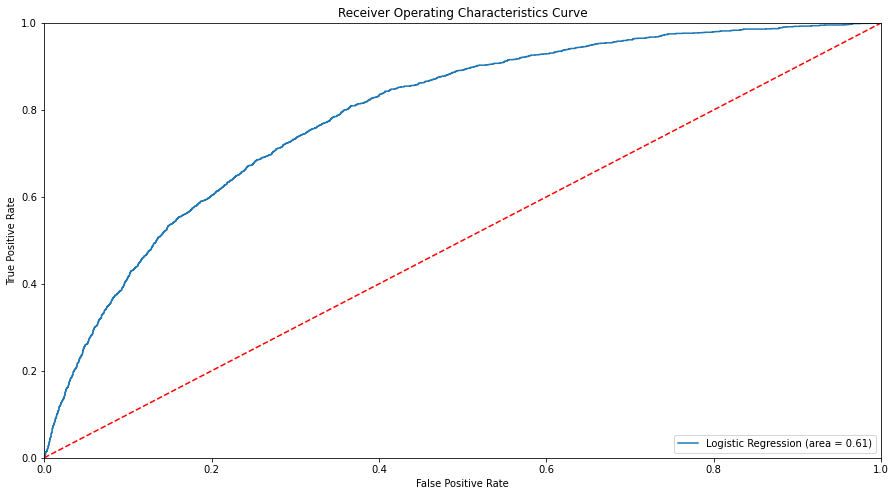

In [181]:
roc_score = roc_auc_score(y, model.predict(X))
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1])
plt.figure(figsize = (15, 8))
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % roc_score)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics Curve')
plt.legend(loc='lower right')
plt.show()

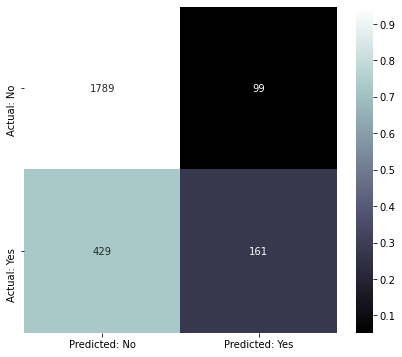

In [182]:
label_preds = lr_predict_test

cm = confusion_matrix(y_test,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

In [183]:
# import matplotlib.pyplot as plt
# sns.heatmap(pd.DataFrame(cm), annot = True, fmt = 'g')
# plt.show()

In [184]:
#### Remove The correlated


In [185]:
threshold=-0.8


In [186]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [187]:
correlation(df1.iloc[:,:-1],threshold)

{'balance',
 'campaign',
 'contact',
 'day',
 'default',
 'duration',
 'education',
 'housing',
 'job',
 'loan',
 'marital',
 'month',
 'pdays',
 'poutcome',
 'previous',
 'salary',
 'targeted'}

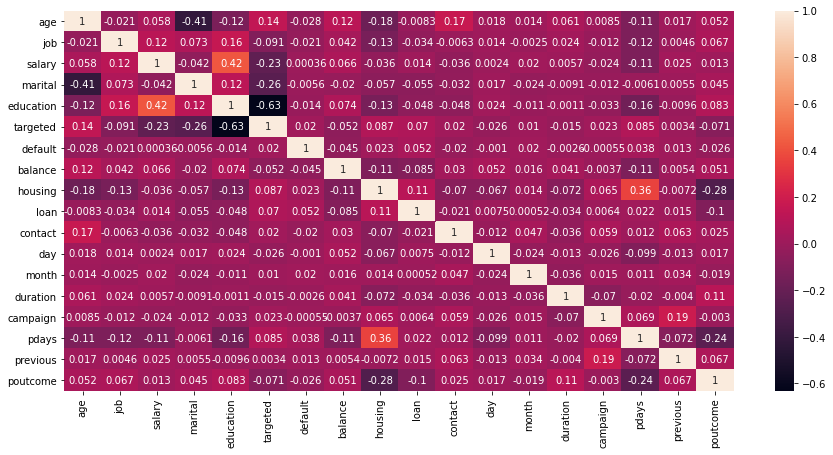

In [188]:
# Checking for correlation
cor_mat=X.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)
plt.show()

In [189]:
from sklearn.feature_selection import mutual_info_classif


In [190]:
mutual_info=mutual_info_classif(X,y)


In [191]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

poutcome     0.096167
pdays        0.076621
duration     0.076589
housing      0.059093
month        0.054434
balance      0.049160
day          0.037461
salary       0.023323
job          0.021068
age          0.013541
education    0.011367
campaign     0.009596
loan         0.005998
previous     0.003391
targeted     0.002881
marital      0.002802
contact      0.000313
default      0.000000
dtype: float64

In [192]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [193]:
# ### Apply SelectKBest Algorithm
# ordered_rank_features=SelectKBest(score_func=chi2,k=10)
# ordered_feature=ordered_rank_features.fit(X,y)

In [194]:
# dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
# dfcolumns=pd.DataFrame(X.columns)

In [195]:
# features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [196]:
# features_rank.columns=['Features','Score']
# features_rank

In [197]:
# features_rank.nlargest(10,'Score')


In [198]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=0)

In [199]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr',max_iter=1000)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7693704600484261

In [200]:
lr.score(X_train, y_train)

0.7842543527630583

In [201]:
#### parameter of logestic regression
#####max_iter=1000, multi_class='ovr', solver='liblinear'

#### Grid Searching key hyperparameer for logistic regression

In [202]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [203]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RepeatedStratifiedKFold

In [204]:
# # define models and parameters
# model = LogisticRegression()
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
# penalty = ['l2']
# c_values = [100, 10, 1.0, 0.1, 0.01]

In [205]:
# # define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)

In [206]:
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [207]:
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [208]:
# grid_search.fit(X_train, y_train)

In [209]:
# best_parameters = grid_search.best_params_
# print(best_parameters)

In [210]:
# best_result = grid_search.best_score_
# print(best_result)

In [211]:
# model

In [212]:
# model = LogisticRegression(C= 100, penalty= 'l2', solver= 'liblinear',max_iter=10000,dual=False)

In [213]:
# model.fit(X_train,y_train.ravel())

In [214]:
# lr_predict_train = model.predict(X_train)

In [215]:
# print("T_Accuracy:",accuracy_score(y_train,lr_predict_train))

In [216]:
# ##### Accuracy of test Data
# lr_predict_test = model.predict(X_test)

In [217]:
# print("test Accuracy",accuracy_score(y_test,lr_predict_test))

In [218]:
# label_preds = lr_predict_test

# cm = confusion_matrix(y_test,label_preds)


# def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
#     plt.figure(figsize=[7, 6])
#     norm_cm = cm
#     if normalized:
#         norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

# plot_confusion_matrix(cm, ['No', 'Yes'])

In [219]:
# cm = confusion_matrix(y_test,label_preds)


In [220]:
# cm

In [221]:
# roc_score = roc_auc_score(y, model.predict(X))
# fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1])
# plt.figure(figsize = (15, 8))
# plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % roc_score)
# plt.plot([0,1], [0,1], 'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristics Curve')
# plt.legend(loc='lower right')
# plt.show()

In [222]:
from sklearn.model_selection import cross_val_score
all_output = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)

In [223]:
print('Accuracies from all CV', all_output)

Accuracies from all CV [0.84027252 0.78576836 0.78652536 0.82286147 0.77819833]


In [224]:
print('Overall Accuracy of this Model:', (all_output.mean()*100))

Overall Accuracy of this Model: 80.27252081756245


#### Predictive model 2: Random Forest
- Make a predictive model using random forest technique
- Use not more than 50 trees, and control the depth of the trees to prevent overfitting
- Estimate the model performance using k fold cross validation
- What is the precision, recall, accuracy of your model?
- Using the feature importance values from the Random Forest module, identify the most important features for the model
    

####  parameters used by a Random Forest Classifier are:

- criterion = the function used to evaluate the quality of a split.
- max_depth = maximum number of levels allowed in each tree.
- max_features = maximum number of features considered when splitting a node.
- min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
- min_samples_split = minimum number of samples necessary in a node to cause node splitting.
- n_estimators = number of trees in the ensamble.

In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score


In [226]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [227]:
# Applying Standard Scaling to make both of them comparable
from sklearn.preprocessing import StandardScaler
mm = StandardScaler()

train = mm.fit_transform(X_train)
test = mm.fit_transform(X_test)

In [228]:
###### Manual Parameter
classifier = RandomForestClassifier(n_estimators=300,criterion='entropy',max_features='sqrt',min_samples_leaf=10,random_state=100)
classifier

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=10, n_estimators=300, random_state=100)

In [229]:
classifier.fit(X_train,y_train.ravel())

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=10, n_estimators=300, random_state=100)

In [230]:
rf_predict_train = classifier.predict(X_train)

In [231]:
#### Accuracy of training data
print("Accuracy of traning_records",accuracy_score(y_train,rf_predict_train))

Accuracy of traning_records 0.8877583979328165


In [232]:
#### Accuracy Of test records is 
rf_predict_test = classifier.predict(X_test)

In [233]:
print("Accuracy of test_records",accuracy_score(y_test,rf_predict_test))

Accuracy of test_records 0.8435835351089589


In [234]:
# Validating on Training
print("Traning Data")
print(recall_score(y_train,rf_predict_train))
print(precision_score(y_train,rf_predict_train))
print(f1_score(y_train,rf_predict_train))
print(accuracy_score(y_train,rf_predict_train))
print('\n')
print("Testing Data")
# Validating on Testing
print(recall_score(y_test,rf_predict_test))
print(precision_score(y_test,rf_predict_test))
print(f1_score(y_test,rf_predict_test))
print(accuracy_score(y_test,rf_predict_test))

Traning Data
0.6310198300283286
0.8366197183098592
0.719418651594671
0.8877583979328165


Testing Data
0.4847870182555781
0.775974025974026
0.5967540574282147
0.8435835351089589


In [235]:
# Confusion Matrix
print('Confusion Matrix for training data is:')
print(confusion_matrix(y_train,rf_predict_train))
print('\n')
print('Confusion Matrix for testing data is:')
print(confusion_matrix(y_test,rf_predict_test))

Confusion Matrix for training data is:
[[4606  174]
 [ 521  891]]


Confusion Matrix for testing data is:
[[1503   69]
 [ 254  239]]


Confussion Matrix for training:




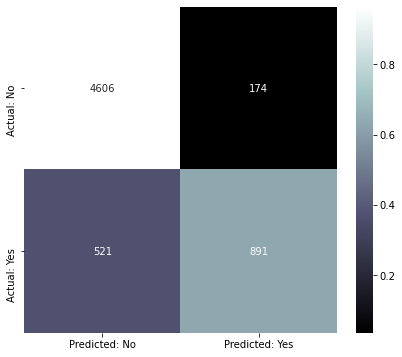

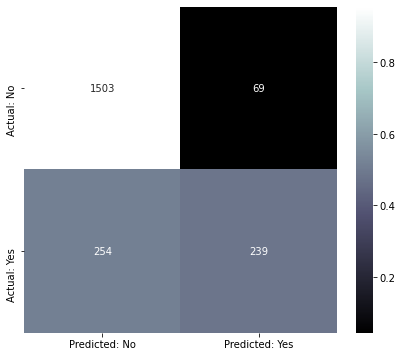

In [236]:
print("Confussion Matrix for training:")
label_preds =rf_predict_train

cm = confusion_matrix(y_train,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])
print("\n")

label_preds =rf_predict_test

cm = confusion_matrix(y_test,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])


In [237]:
#######----train
print(classification_report(y_train,rf_predict_train))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      4780
           1       0.84      0.63      0.72      1412

    accuracy                           0.89      6192
   macro avg       0.87      0.80      0.82      6192
weighted avg       0.88      0.89      0.88      6192



In [238]:
####test
print(classification_report(y_test,rf_predict_test))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      1572
           1       0.78      0.48      0.60       493

    accuracy                           0.84      2065
   macro avg       0.82      0.72      0.75      2065
weighted avg       0.84      0.84      0.83      2065



In [239]:
y.value_counts()

0    6352
1    1905
Name: response, dtype: int64

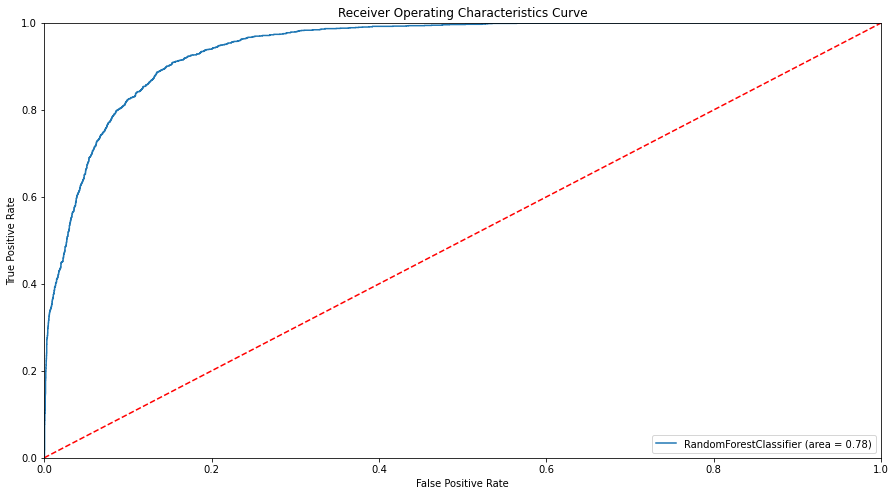

In [240]:
roc_score = roc_auc_score(y, classifier.predict(X))
fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(X)[:,1])
plt.figure(figsize = (15, 8))
plt.plot(fpr, tpr, label = 'RandomForestClassifier (area = %0.2f)' % roc_score)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics Curve')
plt.legend(loc='lower right')
plt.show()

### APply Cross validation

In [241]:
#### Apply cross Validation
from sklearn.model_selection import cross_val_score
all_output = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)

In [242]:
print('Accuracies from all CV', all_output)

Accuracies from all CV [0.85149314 0.83535109 0.8457189  0.84168013 0.84491115]


In [243]:
print('Overall Accuracy of this Model:', (all_output.mean()*100))

Overall Accuracy of this Model: 84.38308813846176


In [244]:
# parameters used by a Random Forest Classifier are:
# criterion = the function used to evaluate the quality of a split.
# max_depth = maximum number of levels allowed in each tree.
# max_features = maximum number of features considered when splitting a node.
# min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
# min_samples_split = minimum number of samples necessary in a node to cause node splitting.
# n_estimators = number of trees in the ensamble.

In [246]:
print(classifier.feature_importances_)

[4.42918597e-02 2.26329715e-02 1.96272178e-02 6.48743832e-03
 1.15021223e-02 3.91161076e-03 1.62475605e-05 4.65379586e-02
 7.55592536e-02 5.82936200e-03 2.34262650e-03 4.76713173e-02
 6.30658404e-02 2.90667415e-01 1.35357105e-02 1.08331414e-01
 1.91548478e-02 2.18834786e-01]


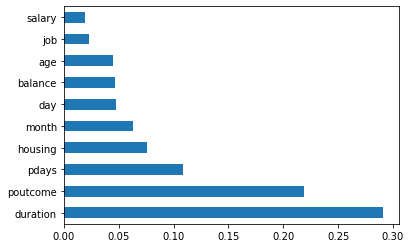

In [251]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

##### Randomized Search Cv

In [252]:
grpr = {"n_estimators": [100,200,300,400,500],
        "criterion":['entropy','gini'],
        'min_samples_leaf':[1,2,3],
        'bootstrap':[True,False]}

In [253]:
from sklearn.model_selection import GridSearchCV
setting = GridSearchCV(estimator=classifier,param_grid =grpr,scoring ="accuracy",cv=5)

In [254]:
import time

In [256]:
start =time.time()

model =setting.fit(X_train,y_train)

end =time.time()

print(f"It took {round(end-start,3)} Second to Buid Model")

It took 1260.8 Second to Buid Model


In [258]:
best_parameters = model.best_params_
print('the best parameter are ',best_parameters)

the best parameter are  {'bootstrap': True, 'criterion': 'gini', 'min_samples_leaf': 2, 'n_estimators': 100}


In [ ]:
score = model.best_score_
print("Accuracy of the model are",score)

In [261]:
clf = RandomForestClassifier(n_estimators =100,bootstrap=True ,min_samples_leaf =2 ,criterion="gini")

In [265]:
model = clf.fit(X_train,y_train)
y_pred =model.predict(X_test)

In [266]:
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print("print confussion matrix is\n",cm)
print("classification report\n",cr)

print confussion matrix is
 [[1486   86]
 [ 230  263]]
classification report
               precision    recall  f1-score   support

           0       0.87      0.95      0.90      1572
           1       0.75      0.53      0.62       493

    accuracy                           0.85      2065
   macro avg       0.81      0.74      0.76      2065
weighted avg       0.84      0.85      0.84      2065



In [267]:
from sklearn.metrics import accuracy_score
print('accuracy score',accuracy_score(y_test,y_pred))

accuracy score 0.8469733656174334


In [271]:
y_train_pred=model.predict(X_train)
print("Traning accuracy",accuracy_score(y_train,y_train_pred))

Traning accuracy 0.9841731266149871


In [283]:
# Validating on Training
print("Traning recods")
print("recall_score:",recall_score(y_train,y_train_pred))
print("precision_score:",precision_score(y_train,y_train_pred))
print("f1_score:",f1_score(y_train,y_train_pred))
print("accuracy_score:",accuracy_score(y_train,y_train_pred))
print('\n')
print("Testing records")
# Validating on Testing
print("recall_score:",recall_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))
print('accuracy_score:',accuracy_score(y_test,y_pred))

Traning recods
recall_score: 0.9376770538243626
precision_score: 0.992503748125937
f1_score: 0.9643117261471231
accuracy_score: 0.9841731266149871


Testing records
recall_score: 0.5334685598377282
precision_score: 0.7535816618911175
f1_score: 0.6247030878859857
accuracy_score: 0.8469733656174334


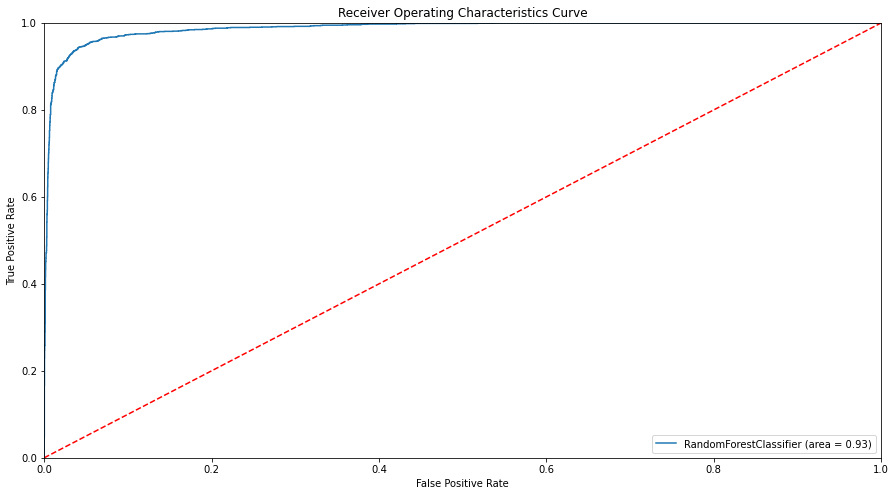

In [295]:
roc_score = roc_auc_score(y, model.predict(X))
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1])
plt.figure(figsize = (15, 8))
plt.plot(fpr, tpr, label = 'RandomForestClassifier (area = %0.2f)' % roc_score)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics Curve')
plt.legend(loc='lower right')
plt.show()

#### Randomized search cv

In [297]:
grpr

{'n_estimators': [100, 200, 300, 400, 500],
 'criterion': ['entropy', 'gini'],
 'min_samples_leaf': [1, 2, 3],
 'bootstrap': [True, False]}

In [298]:
rspr = {"n_estimators": [100,200,300,400,500],
        "criterion":['entropy','gini'],
        'min_samples_leaf':[1,2,3],
        'bootstrap':[True,False]}

In [299]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(clf,rspr, cv = 5,random_state = 1)

In [300]:
from sklearn.ensemble import RandomForestClassifier

In [301]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 100)

In [302]:
import time

In [303]:
start =time.time()

model =rscv.fit(X_train,y_train)

end =time.time()

print(f"It took {round(end-start,3)} Second to Buid Model")

It took 238.946 Second to Buid Model


In [304]:
best_parameters = model.best_params_
print('the best parameter are ',best_parameters)

the best parameter are  {'n_estimators': 500, 'min_samples_leaf': 2, 'criterion': 'entropy', 'bootstrap': False}


In [305]:
score = model.best_score_
print("Accuracy of the model are",score)

Accuracy of the model are 0.8469000874904328


In [306]:
clf = RandomForestClassifier(n_estimators =200,bootstrap=False ,min_samples_leaf =3 ,criterion="entropy")

In [307]:
model = clf.fit(X_train,y_train)
y_pred =model.predict(X_test)

In [308]:
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print("print confussion matrix is\n",cm)
print("classification report\n",cr)

print confussion matrix is
 [[1485   87]
 [ 219  274]]
classification report
               precision    recall  f1-score   support

           0       0.87      0.94      0.91      1572
           1       0.76      0.56      0.64       493

    accuracy                           0.85      2065
   macro avg       0.82      0.75      0.77      2065
weighted avg       0.84      0.85      0.84      2065



In [309]:
from sklearn.metrics import accuracy_score
print(' test accuracy score',accuracy_score(y_test,y_pred))

 test accuracy score 0.85181598062954


In [310]:
# Validating on Training
print("Traning recods")
print("recall_score:",recall_score(y_train,y_train_pred))
print("precision_score:",precision_score(y_train,y_train_pred))
print("f1_score:",f1_score(y_train,y_train_pred))
print("accuracy_score:",accuracy_score(y_train,y_train_pred))
print('\n')
print("Testing records")
# Validating on Testing
print("recall_score:",recall_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))
print('accuracy_score:',accuracy_score(y_test,y_pred))

Traning recods
recall_score: 0.9830028328611898
precision_score: 1.0
f1_score: 0.9914285714285715
accuracy_score: 0.9961240310077519


Testing records
recall_score: 0.5557809330628803
precision_score: 0.7590027700831025
f1_score: 0.6416861826697893
accuracy_score: 0.85181598062954


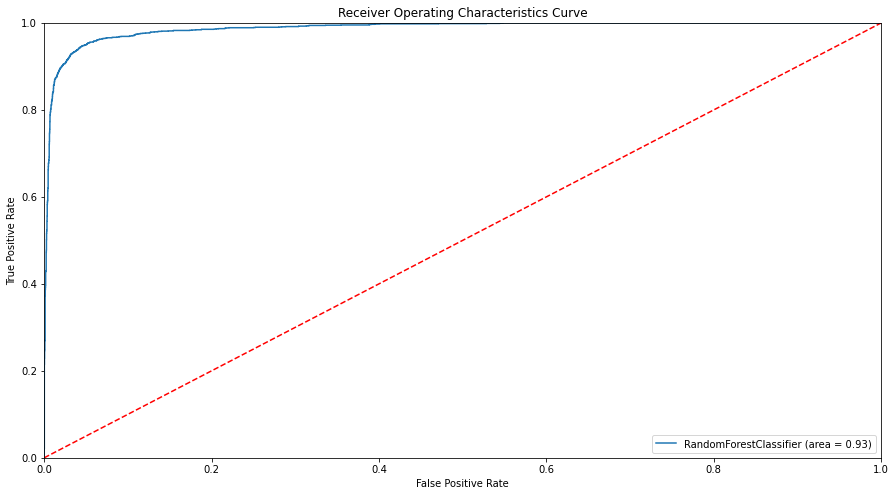

In [311]:
roc_score = roc_auc_score(y, model.predict(X))
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1])
plt.figure(figsize = (15, 8))
plt.plot(fpr, tpr, label = 'RandomForestClassifier (area = %0.2f)' % roc_score)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#####  logistic regression


# 'balance',
#  'campaign',
#  'contact',
#  'day',
#  'default',
#  'duration',
#  'education',
#  'housing',
#  'job',
#  'loan',
#  'marital',
#  'month',
#  'pdays',
#  'poutcome',
#  'previous',
#  'salary',
#  'targeted'}

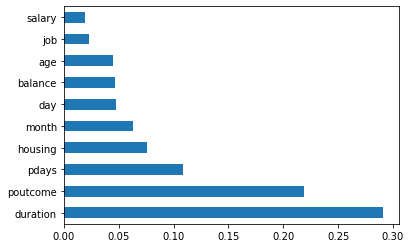

In [312]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### Compare the performance of the Random Forest and the logistic model –
- Evaluate both models on the test set
- Which metric did you choose and why?
- Which model has better performance on the test set? 
- Compare the feature importance from the different models – do they agree? Are the top features similar in both models